## Figure for paper 1

# Rigidity Development and Contact Structures in Bidisperse Suspensions
#### Rahul Pandare, Michel Orsi, Mark Shattuck, Jeff Morris

In [9]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
import random
from matplotlib.lines import Line2D
import colorsys
import platform
from pathlib import Path
from matplotlib import colors
import readFiles

# Matplotlib rc parameters modification
def updateContAngle(theta, contList):
    '''
    This function to calulated the complementary contact angle and append to 
    relevant list (contList)

    Inputs:
    theta    - primary contact angle. Calculated by arctan2(nz,nx)
    contList - list where the angle appends. This list contains all the contact angle for one case, all runs
    '''
    contList.append(theta)
    if theta < 0:
        contList.append(np.pi - abs(theta))
    else:
        contList.append(theta - np.pi)

def particleSizeList(randomSeedFile, sizeRatio, npp = 1000):
    '''
    This function reads the random seed file and creates
    a list of particle sizes. The list index is the particle index.

    Inputs:
    randomSeedFile - location for the random seed file. It contains the particle index and sizes
    sizeRatio      - delta or ar for the case
    npp            - system size
    '''

    if sizeRatio == 1:
        # Painting particles randomly in two colours for monodisperse case.
        particleSize = [1]*(int(npp/2)) + [2]*(int(npp/2))
        random.shuffle(particleSize)
    else:
        particleSize = np.loadtxt(randomSeedFile, usecols = 3) # reading only column 3 which has particle size
        randomSeedFile.close()
    return particleSize
    
plt.rcParams.update({
  "figure.max_open_warning" : 0,
  "text.usetex"             : True,
  "text.latex.preamble"     : r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
  "figure.autolayout"       : True,
  "font.family"             : "STIXGeneral",
  "mathtext.fontset"        : "stix",
  "font.size"               : 8,
  "xtick.labelsize"         : 8,
  "ytick.labelsize"         : 8,
  "lines.linewidth"         : 1,
  "lines.markersize"        : 5,
})
#plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

fig_width = 7.05826  #inches

if platform.system() == 'Darwin':  # macOS
    topDir = Path("/Volumes/rahul_2TB/high_bidispersity/new_data/")
    fig_save_path = Path("/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/")
elif platform.system() == 'Linux':
    topDir = Path("/media/rahul/rahul_2TB/high_bidispersity/new_data/")
    fig_save_path = Path("/home/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/")
else:
    raise OSError("Unsupported OS")

In [23]:
# fit for viscosity

phim = [
    [0.7886717028827888, 0.7894387136954615, 0.793926329607985, 0.8324103075865033],
    [0.7886717028827888, 0.7877885526918533, 0.7939236898756902, 0.8239196866554372],
    [0.7886717028827888, 0.7885308930400247, 0.7900830006913417, 0.8044291017153138]
]

cvals = [
    [2.2961534930915994, 2.3650311285005365, 2.3581023842731605, 2.630286432009137],
    [2.2961534930915994, 2.2844228427617583, 2.2697625367992815, 2.355255703134564],
    [2.2961534930915994, 2.3000699722687648, 2.217088555299523, 2.2226341715514715]
]

# fit for particle pressure
phim1 =[[1.5715168229270542,
  1.5682151816482461,
  1.5553795002364215,
  1.9388390284729693],
 [1.5715168229270542,
  1.4836455409253317,
  1.5358291150105385,
  1.6539741565472672],
 [1.5715168229270542,
  1.564849769378203,
  1.4894275394110041,
  1.5109527282076463]]

cvals1 = [[8.624202080168285, 8.571864298284478, 8.36217328239919, 10.865249036885515],
 [8.624202080168285, 7.9125522663596, 8.198785417742185, 8.697407647559611],
 [8.624202080168285, 8.553277946417671, 7.898454068926786, 7.850309324906102]]

from prettytable import PrettyTable
from IPython.display import display, HTML

# Inputs
visc = 3500
delta = [1.0, 1.4, 2.0, 4.0]
zeta = ['0.25', '0.5', '0.75']

# Assume phim and cvals are already defined elsewhere
# phim[i][j] and cvals[i][j]

# Build the table
table = PrettyTable()
headers = ['ζ']  # Start with zeta

for i, d in enumerate(delta):
    headers.append(f'ϕ (δ={d})')
    headers.append(f'ϕ/ϕₘ (δ={d})')
    if i < len(delta) - 1:
        headers.append(f'⸺{i}')  # Unique invisible spacer using em-dash and index

table.field_names = headers

# Fill in rows
for i, z in enumerate(zeta):
    row = [z]
    for j, d in enumerate(delta):
        phi_m = phim[i][j]
        c = cvals[i][j]
        phi = phi_m * (1 - visc ** (-1 / c))
        phi_ratio = phi / phi_m
        row.append(f"{phi:.4f}")
        row.append(f"{phi_ratio:.4f}")
        if j < len(delta) - 1:
            row.append('')
    table.add_row(row)

# Display in HTML
html_table = f"""
<div style='display: flex; justify-content: center; font-size: 20px;'>
    <div style='padding: 10px;'>
        {table.get_html_string()}
    </div>
</div>
"""
display(HTML(html_table))

In [24]:
from prettytable import PrettyTable
from IPython.display import display, HTML

# Inputs
pp = 0.97  # phi / phi_m
delta = [1.0, 1.4, 2.0, 4.0]  # aspect ratios
zeta = ['0.25', '0.5', '0.75']  # volume ratios

# phim[i][j] and cvals[i][j] must be defined already
# Assume they are len(zeta) x len(delta) matrices

# Initialize PrettyTable
table = PrettyTable()
headers = ['ζ']  # Start with zeta (volume ratio)

for i, d in enumerate(delta):
    headers.append(f'ϕ (δ={d})')
    headers.append(f'η (δ={d})')  # viscosity column
    if i < len(delta) - 1:
        headers.append(f'⸺{i}')  # Unique spacer to prevent header name clash

table.field_names = headers

# Populate the table
for i, z in enumerate(zeta):
    row = [z]
    for j, d in enumerate(delta):
        phi_m = phim[i][j]
        c     = cvals[i][j]
        phi   = pp * phi_m
        visc  = (1 - pp) ** (-c)
        row.append(f"{phi:.4f}")
        row.append(f"{visc:.2f}")
        if j < len(delta) - 1:
            row.append('')  # Spacer content
    table.add_row(row)

# Display in styled HTML
html_table = f"""
<div style='display: flex; justify-content: center; font-size: 20px;'>
    <div style='padding: 10px;'>
        {table.get_html_string()}
    </div>
</div>
"""
display(HTML(html_table))

### Figure 2

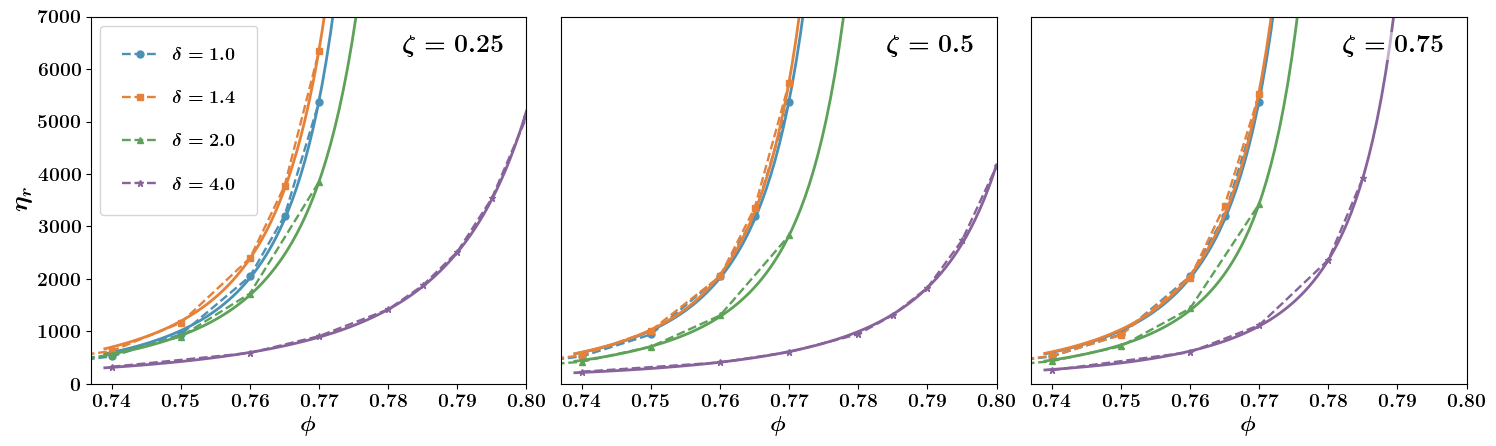

In [13]:
# maron pierce all plots
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

def maronpierce(x,c,k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return 1 * (base ** -c)

#cmap = matplotlib.colormaps['viridis_r'] #color scheme
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
phim    = []
cvals   = []
k_guess = [[.785,.785,.792,0.82],
           [.785,.785,.792,0.815],
           [.785,.785,.792,0.8]]
           # initial guess for max phi (phim)

fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

for i, vri in enumerate(vrr):
    rerr    = [] # r2 error
    phims    = [] # max phi calculated from fitting
    c_list  = []
    for j, arj in enumerate(arr):
        visc = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan) 

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        # curve fit
        popt, pcov   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,[1,k_guess[i][j]])
        c_opt, k_opt = popt
        phims.append(k_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], 
                   #label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), 
                   label=r'$\delta = {:.1f}$'.format(arj,k_opt), 
                   color=colors[j],linewidth=1.7)
        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        c_list.append(c_opt)

        # plotting for model
        xx = np.linspace(0.739, .80, 100)
        yy = maronpierce(xx,c_opt,k_opt)
        ax[i].plot(xx, yy, color = colors[j], linewidth=2)
            
    phim.append(phims)
    cvals.append(c_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    ax[i].set_xlim(.737, .80)
    ax[i].set_ylim(0, 7000)
    ax[i].set_xlabel(r'$\phi$', fontsize=16,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=14)
    ax[0].legend(loc='upper left', fontsize=13, labelspacing=1.5, borderpad=1.2)
    #ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    ax[i].text(0.95, 0.95, fr'$\zeta = {vrr[i]}$', 
               fontsize=18,
               ha='right', va='top',            # Align text to top-right
               transform=ax[i].transAxes,       # Use axes coordinates (0-1)
               bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=18,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=14)
ax[1].set_yticks([])
ax[2].set_yticks([])

fig.tight_layout()

figsave=True
if figsave:
    figFormat=".pdf"
    plt.savefig(fig_save_path+ 'Maron_Pierce_fit'+figFormat, bbox_inches="tight",dpi=500)

plt.show()

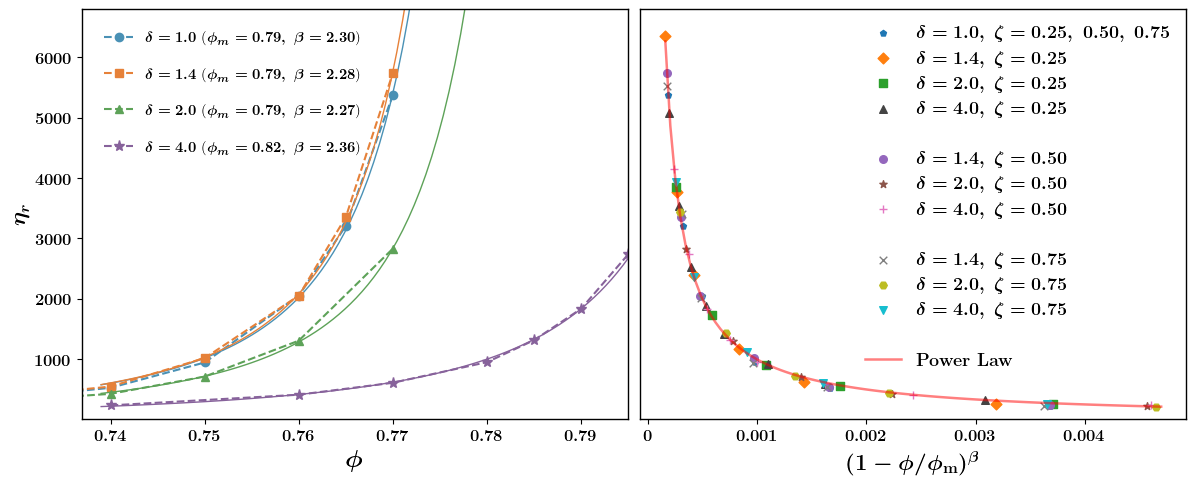

Completed: B ~ 2.324260


In [23]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Math
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
import matplotlib.patches as patches

# Suppress specific warnings
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

# Define Maron-Pierce model
def maronpierce(x, c, k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Avoid negative/zero base
    return (base ** -(c))

# Power law fitting
def power_law(x, a, b):
    return a * x**b

# Plot styling
line_markers = ['o', 's', '^', '*', 'p']
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

# Mac paths
#topDir = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

#linux
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/'

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = '0.5'
numRuns = 2
off     = 100
c_guess = 3
k_guess = [0.785, 0.785, 0.792, 0.815]
fig, ax = plt.subplots(1, 2, figsize=(12, 4.9))
rerr, phims, c_list = [], [], []

for j, arj in enumerate(arr):
    visc = []
    
    for phi in phiv:
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data = np.loadtxt(dataFile)
                if len(data[off:, 3]) > off:
                    visc_list.append(np.mean(data[off:, 3]))
        
        visc.append(np.mean(visc_list) if visc_list else np.nan)

    # Remove NaN values for fitting
    visc_filtered = [x for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

    # Curve fitting
    popt, _ = curve_fit(maronpierce, phi_vals_filtered, visc_filtered, p0=[c_guess, k_guess[j]])
    c_opt, k_opt = popt
    phims.append(k_opt)
    c_list.append(c_opt)

    # Plot raw data
    msize = 8 if line_markers[j] == '*' else 6
    ax[0].plot(phi_vals_filtered, visc_filtered, linestyle='--', marker=line_markers[j], 
               label=rf'$\delta = {arj:.1f}$ ($\phi_m = {k_opt:.2f}, \; \beta = {c_opt:.2f}$)', 
               color=colors[j], linewidth=1.5, markersize=msize)

    # Plot Maron-Pierce model fit
    xx = np.linspace(0.739, 0.80, 100)
    yy = maronpierce(xx, c_opt, k_opt)
    ax[0].plot(xx, yy, color=colors[j])

#########################################################################################################

arr = [1.4, 2.0, 4.0]
vrr = ['0.25', '0.5', '0.75']
viscall = []
phimall = []
pcount  = 0

colors  = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#f6a821', '#f6d020',
    '#003366', '#cc6699'
]
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']

## plotting ar = 1 and vr = 0.25 case first
visc1, viscerr1     = [], []
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_list, viscerr_list = [], []
    for run in range(numRuns):
        phim_vals = [(1 - (i / phim[0][0])) ** (cvals[0][0]) if phim[0][0] != 0 and (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            #print(workDir)
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
    visc1.append(np.mean(visc_list) if visc_list else np.nan)
    viscerr1.append(np.mean(viscerr_list) if viscerr_list else np.nan)

visc_filtered      = [x for x in visc1 if not np.isnan(x)]
viscerr_filtered   = [x for x in viscerr1 if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(visc1, phim_vals) if not np.isnan(x)]

viscall.append(visc_filtered)
phimall.append(phim_vals_filtered)

ax[1].scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
    label = fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$', color=colors[pcount])
pcount += 1

# plotting other cases        
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc, viscerr     = [], []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list, viscerr_list = [], []
            for run in range(numRuns):
                phim_vals = [(1 - (i/phim[l][j+1])) ** (cvals[l][j+1]) if phim[l][j+1] != 0 and 
                             (1 - (i / phim[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
                    viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            viscerr.append(np.mean(viscerr_list) if viscerr_list else np.nan)
        
        visc_filtered      = [x for x in visc if not np.isnan(x)]
        viscerr_filtered   = [x for x in viscerr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(visc, phim_vals) if not np.isnan(x)]

        viscall.append(visc_filtered)
        phimall.append(phim_vals_filtered)
        ax[1].scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=30, 
            label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$', color=colors[pcount])
        pcount += 1
        
    ax[1].plot([], [], ' ', label=" ") 
    
viscFlat = [i for sublist in viscall for i in sublist]
phimFlat = [i for sublist in phimall for i in sublist]

params, covariance = curve_fit(power_law, phimFlat, viscFlat)
a, b = params
xlin = np.linspace(1.6e-4, 47e-4, 100)
#plt.plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$: $y = {a:.2f} \cdot x^{{{b:.2f}}}$", linewidth=1.5, alpha=0.4)
ax[1].plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$", linewidth=1.8, alpha=0.5)

# Set axis limits and labels
ax[0].set_xlim(0.737, 0.795)
ax[0].set_xlabel(r'$\mathbf{\phi}$', fontsize=18, fontstyle='italic', fontweight='bold')
ax[0].set_ylabel(r'$\mathbf{\eta}_{r}$', fontsize=16, fontstyle='italic', fontweight='bold')
ax[0].tick_params(axis='x', labelsize=12, labelcolor='black')
ax[0].tick_params(axis='y', labelsize=12, labelcolor='black')
ax[0].legend(loc='upper left', fontsize=10.5, labelspacing=1.5, borderpad=1, frameon=False)

# Axis styling
ax[1].set_xlabel(r'$\mathbf{(1-\phi/\phi_m)^{\beta}}$', fontsize=16, fontstyle='italic', fontweight='bold', labelpad=5)
ax[0].set_ylim(1, 6800)
ax[1].set_ylim(1, 6800)  # Changed y-limit
ax[1].set_yticks([])  # Remove y-ticks
ax[1].set_ylabel("")  # Remove y-label
ax[1].set_xticks(np.arange(0, 0.005, 0.001))
ax[1].set_xticklabels(["$0$", "$0.001$", "$0.002$", "$0.003$", "$0.004$"], fontsize=12)
ax[1].legend(loc='upper right', fontsize=13, frameon=False, labelspacing=0.5)

for a in ax:  # Loop over subplots
    a.spines['top'].set_linewidth(1)
    a.spines['right'].set_linewidth(1)
    a.spines['left'].set_linewidth(1)
    a.spines['bottom'].set_linewidth(1)

# Adjust layout and display plot
fig.tight_layout()

if True:
    figFormat=".pdf"
    plt.savefig(fig_save_path+'powerlaw_all_phim'+figFormat, bbox_inches="tight",dpi=800)
plt.show()

print(f"Completed: B ~ {np.mean(cvals):3f}")

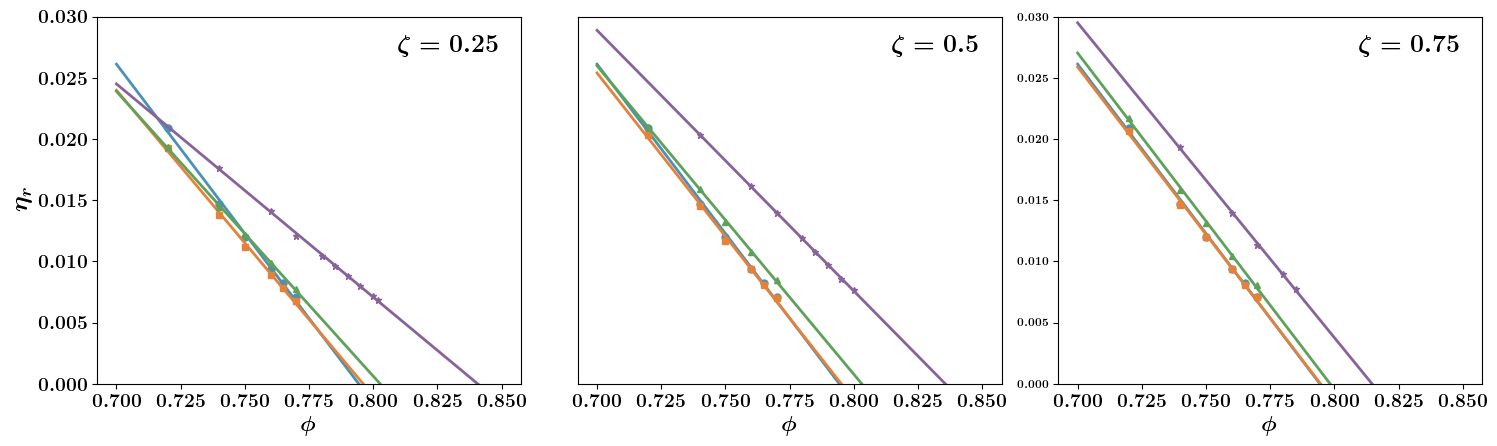

In [8]:
# maron pierce all plots
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

def maronpierce(x,c,k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return 1 * (base ** -c)

def linearfit(x,c,m):
    return m*x + c

#cmap = matplotlib.colormaps['viridis_r'] #color scheme
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
c0s    = []
mvals   = []
k_guess = [[.785,.785,.792,0.82],
           [.785,.785,.792,0.815],
           [.785,.785,.792,0.8]]
           # initial guess for max phi (phim)

fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

for i, vri in enumerate(vrr):
    c0      = [] # y intercept
    m_list  = []
    for j, arj in enumerate(arr):
        visc = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_val = np.mean(data[off:, 3])
                    visc_list.append(visc_val) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan) 

        visc_filtered     = [np.log(x)**-2.3 for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        # curve fit
        popt, pcov   = curve_fit(linearfit, phi_vals_filtered, visc_filtered,)#[1, k_guess[i][j]])
        c_opt, m_opt = popt
        c0.append(c_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,
                   linestyle='None',         # or linestyle=''
                   marker=line_markers[j],   # like 'o', 'x', '^', etc.
                   color=colors[j],
                   linewidth=1.7)            # linewidth has no effect if no line, optional

        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        m_list.append(m_opt)

        #plotting for model
        xx = np.linspace(0.70, .85, 100)
        yy = linearfit(xx,c_opt,m_opt)
        ax[i].plot(xx, yy, color = colors[j], linewidth=2)
            
    c0s.append(c0)
    mvals.append(m_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    #ax[i].set_xlim(.737, .80)
    ax[i].set_ylim(0, 0.03)
    ax[i].set_xlabel(r'$\phi$', fontsize=16,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=14)
    #ax[0].legend(loc='upper left', fontsize=13, labelspacing=1.5, borderpad=1.2)
    #ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    ax[i].text(0.95, 0.95, fr'$\zeta = {vrr[i]}$', 
               fontsize=18,
               ha='right', va='top',            # Align text to top-right
               transform=ax[i].transAxes,       # Use axes coordinates (0-1)
               bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))
    
# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=18,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=14)
ax[1].set_yticks([])
#ax[2].set_yticks([])

fig.tight_layout()

figsave=False
if figsave:
    figFormat=".pdf"
    plt.savefig(fig_save_path+ 'Maron_Pierce_fit'+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [39]:
np.array(c0s)

array([[0.21996762, 0.19882066, 0.18684963, 0.14647157],
       [0.21996762, 0.2123207 , 0.20247482, 0.17801873],
       [0.21996762, 0.21746867, 0.2195139 , 0.20963727]])

In [9]:
x_intercept = -np.array(c0s) / np.array(mvals)
x_intercept

array([[0.7943399 , 0.79606849, 0.80267267, 0.84066407],
       [0.7943399 , 0.7951267 , 0.8030732 , 0.83560696],
       [0.7943399 , 0.79460515, 0.79832769, 0.8146439 ]])

R^2: 0.9981
R^2: 0.9979
R^2: 0.9996
R^2: 0.9992
R^2: 0.9981
R^2: 0.9985
R^2: 0.9994
R^2: 0.9992
R^2: 0.9981
R^2: 0.9988
R^2: 0.9996
R^2: 0.9997


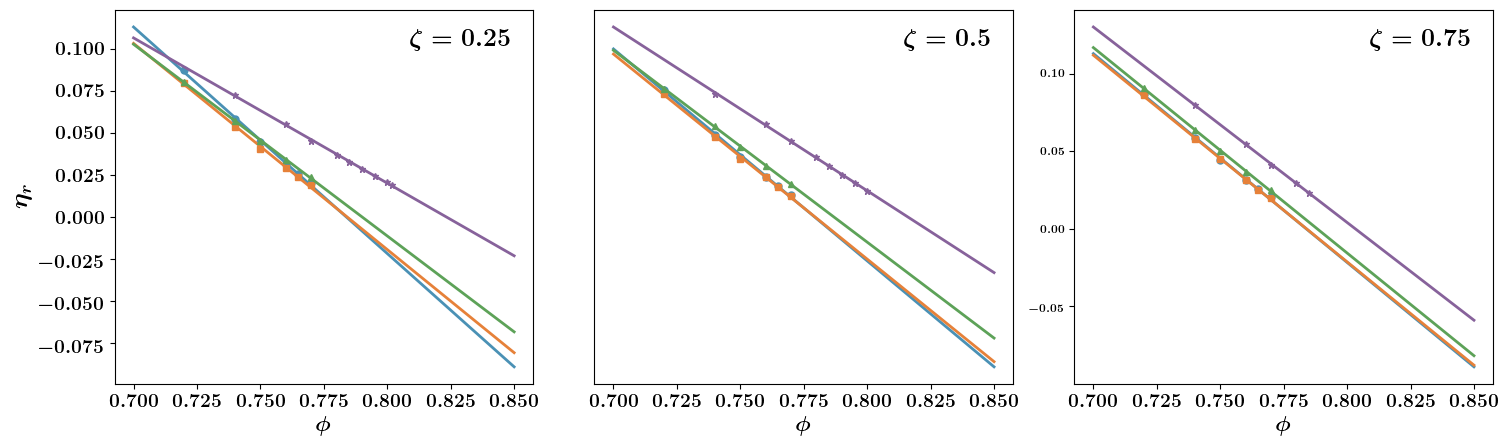

In [17]:
# maron pierce all plots
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)
from sklearn.metrics import r2_score

def maronpierce(x,c,k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return 1 * (base ** -c)

def linearfit(x,c,m):
    return m*x + c

#cmap = matplotlib.colormaps['viridis_r'] #color scheme
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
c0s    = []
mvals   = []
k_guess = [[.785,.785,.792,0.82],
           [.785,.785,.792,0.815],
           [.785,.785,.792,0.8]]
           # initial guess for max phi (phim)

fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

for i, vri in enumerate(vrr):
    c0      = [] # y intercept
    m_list  = []
    for j, arj in enumerate(arr):
        visc = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_val = np.mean(data[off:, 3])
                    visc_list.append(visc_val) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan) 

        visc_filtered     = [x**(1/-2.2) for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        # curve fit
        popt, pcov   = curve_fit(linearfit, phi_vals_filtered, visc_filtered,)#[1, k_guess[i][j]])
        c_opt, m_opt = popt
        c0.append(c_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,
                   linestyle='None',         # or linestyle=''
                   marker=line_markers[j],   # like 'o', 'x', '^', etc.
                   color=colors[j],
                   linewidth=1.7)            # linewidth has no effect if no line, optional

        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        m_list.append(m_opt)

        #plotting for model
        xx = np.linspace(0.70, .85, 100)
        yy = linearfit(xx,c_opt,m_opt)
        ax[i].plot(xx, yy, color = colors[j], linewidth=2)

        # True y values
        y_true = visc_filtered
        
        # Predicted y values using the model
        y_pred = linearfit(np.array(phi_vals_filtered), c_opt, m_opt)
        
        # Compute R^2
        r2 = r2_score(y_true, y_pred)
        print(f"R^2: {r2:.4f}")

    c0s.append(c0)
    mvals.append(m_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    #ax[i].set_xlim(.737, .80)
    #ax[i].set_ylim(0, 0.03)
    ax[i].set_xlabel(r'$\phi$', fontsize=16,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=14)
    #ax[0].legend(loc='upper left', fontsize=13, labelspacing=1.5, borderpad=1.2)
    #ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    ax[i].text(0.95, 0.95, fr'$\zeta = {vrr[i]}$', 
               fontsize=18,
               ha='right', va='top',            # Align text to top-right
               transform=ax[i].transAxes,       # Use axes coordinates (0-1)
               bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))
    
# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=18,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=14)
ax[1].set_yticks([])
#ax[2].set_yticks([])

fig.tight_layout()

figsave=False
if figsave:
    figFormat=".pdf"
    plt.savefig(fig_save_path+ 'Maron_Pierce_fit'+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [15]:
phi_vals_filtered

[0.72, 0.74, 0.75, 0.76, 0.765, 0.77]

In [4]:
mvals

[[-0.27691876427225637,
  -0.24975321526954689,
  -0.23278434885921617,
  -0.17423317507379354],
 [-0.27691876427225637,
  -0.26702750743186965,
  -0.2521249872101866,
  -0.2130412186179774],
 [-0.27691876427225637,
  -0.27368142181108196,
  -0.2749671570777795,
  -0.2573360814280531]]

## Sigma_11 and Sigma_22 (Normal stresses)

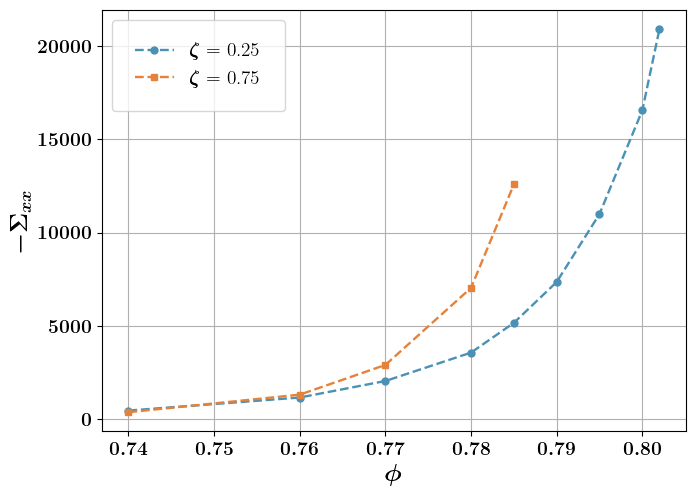

In [85]:
# Sigma_11 or sigma_xx plot

colors        = ['#4a91b5', '#e68139']  # Colors for Vr = 0.25 and 0.75
line_markers  = ['o', 's']              # Markers for Vr = 0.25 and 0.75

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
vrr_list = ['0.25', '0.75']
numRuns = 2
off     = 100
arj     = 4.0  # Single aspect ratio

plt.figure(figsize=(7, 5))

for idx, vrj in enumerate(vrr_list):
    norm_stress = []
    for phi in phiv:
        phir             = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        norm_stress_list = []
        for run in range(numRuns):
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                data_files = glob.glob(workDir + "data_*.dat")
                if data_files:
                    data = np.loadtxt(data_files[0])
                    if len(data[off:, 10]) > 0:
                        norm_stress_list.append(-np.mean(data[off:, 11] + data[off:, 12]))
        norm_stress.append(np.mean(norm_stress_list) if norm_stress_list else np.nan)

    norm_stress_filtered     = [x for x in norm_stress if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(norm_stress, phiv) if not np.isnan(x)]

    plt.plot(phi_vals_filtered, norm_stress_filtered,
             linestyle='--',
             marker=line_markers[idx],
             color=colors[idx],
             linewidth=1.7,
             label=fr'$\zeta$ = {vrj}')

plt.xlabel(r'$\phi$', fontsize=18)
plt.ylabel(r'$-\Sigma_{11}$', fontsize=18)
#plt.yscale('log')
#plt.title('Viscosity vs Volume Fraction for AR = 4.0')
plt.legend(fontsize=14, borderpad=1.2)
plt.grid(True)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
# Optional: Save the figure
# plt.savefig(os.path.join(fig_save_path, 'viscosity_vs_phi_AR4.png'), dpi=300)
plt.show()

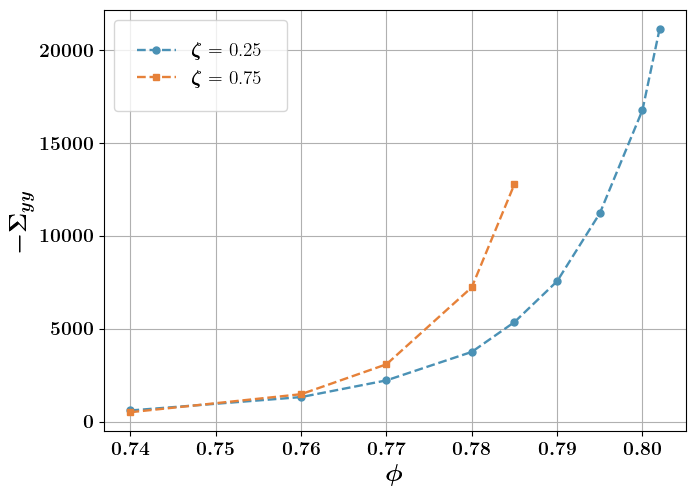

In [86]:
# Sigma_yy plot sigma 22

colors        = ['#4a91b5', '#e68139']  # Colors for Vr = 0.25 and 0.75
line_markers  = ['o', 's']              # Markers for Vr = 0.25 and 0.75

# Parameters
npp      = 1000
phiv     = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
vrr_list = ['0.25', '0.75']
numRuns = 2
off     = 100
param   = 11
arj     = 4.0  # Single aspect ratio

plt.figure(figsize=(7, 5))

for idx, vrj in enumerate(vrr_list):
    norm_stress = []
    for phi in phiv:
        phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        norm_stress_list = []
        for run in range(numRuns):
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                data_files = glob.glob(workDir + "data_*.dat")
                if data_files:
                    data = np.loadtxt(data_files[0])
                    if len(data[off:, param]) > 0:
                        norm_stress_list.append(-np.mean(data[off:, param]))
        norm_stress.append(np.mean(norm_stress_list) if norm_stress_list else np.nan)

    norm_stress_filtered     = [x for x in norm_stress if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(norm_stress, phiv) if not np.isnan(x)]

    plt.plot(phi_vals_filtered, norm_stress_filtered,
             linestyle='--',
             marker=line_markers[idx],
             color=colors[idx],
             linewidth=1.7,
             label=fr'$\zeta$ = {vrj}')

plt.xlabel(r'$\phi$', fontsize=18)
plt.ylabel(r'$-\Sigma_{22}$', fontsize=18)
#plt.yscale('log')
#plt.title('Viscosity vs Volume Fraction for AR = 4.0')
plt.legend(fontsize=14, borderpad=1.2)
plt.grid(True)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
# Optional: Save the figure
# plt.savefig(os.path.join(fig_save_path, 'viscosity_vs_phi_AR4.png'), dpi=300)
plt.show()

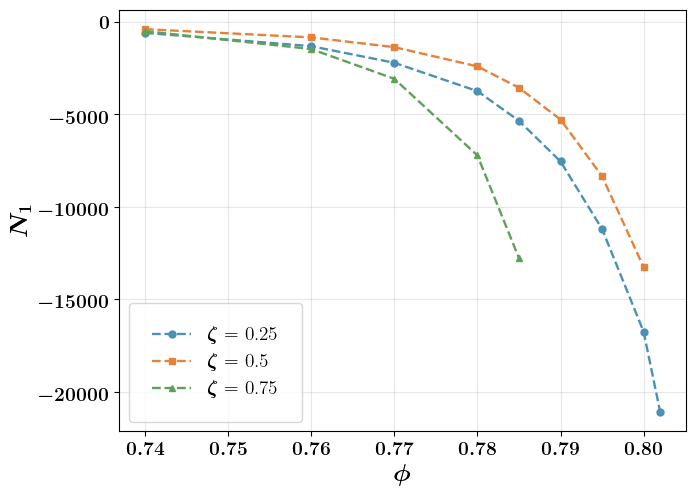

In [17]:
# Sigma_11 or sigma_xx plot

# colors        = ['#4a91b5', '#e68139']  # Colors for Vr = 0.25 and 0.75
# line_markers  = ['o', 's']              # Markers for Vr = 0.25 and 0.75
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
vrr_list = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
arj     = 4.0  # Single aspect ratio

plt.figure(figsize=(7, 5))

for idx, vrj in enumerate(vrr_list):
    norm_stress = []
    for phi in phiv:
        phir             = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        norm_stress_list = []
        for run in range(numRuns):
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                data_files = glob.glob(workDir + "data_*.dat")
                if data_files:
                    data = np.loadtxt(data_files[0])
                    if len(data[off:, 10]) > 0:
                        norm_stress_list.append(np.mean(data[off:, 11]))
        norm_stress.append(np.mean(norm_stress_list) if norm_stress_list else np.nan)

    norm_stress_filtered     = [x for x in norm_stress if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(norm_stress, phiv) if not np.isnan(x)]

    plt.plot(phi_vals_filtered, norm_stress_filtered,
             linestyle='--',
             marker=line_markers[idx],
             color=colors[idx],
             linewidth=1.7,
             label=fr'$\zeta$ = {vrj}')

plt.xlabel(r'$\phi$', fontsize=18)
plt.ylabel(r'$N_{1}$', fontsize=18)
#plt.yscale('log')
#plt.title('Viscosity vs Volume Fraction for AR = 4.0')
plt.legend(fontsize=14, borderpad=1.2)
plt.grid(True, alpha =0.3)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
# Optional: Save the figure
# plt.savefig(os.path.join(fig_save_path, 'viscosity_vs_phi_AR4.png'), dpi=300)
plt.show()

## Fig 3

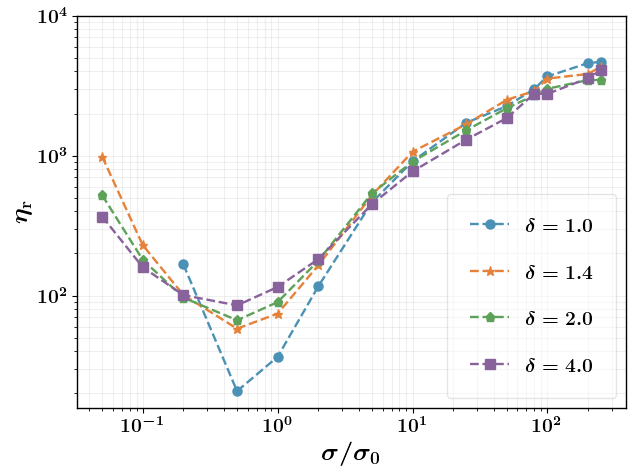

In [4]:
## flow curve (for new data)

## phi/phim = 0.97

npp = 1000
vr  = '0.5'
# below lists should be of the same length
phi = [0.765, 0.765, 0.77, 0.795]
ar  = [1.0, 1.4, 2.0, 4.0]

numRun = 1
line_markers = ['o', '*', 'p', 's']

stress = ['0.05','0.1','0.2', '0.5', '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress1 = [float(s) for s in stress]

#linux
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/flow_curves/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/'

#mac
#topDir = "/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves"
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

off  = 100
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']

for j, arj in enumerate(ar):
    visc     = [np.nan for _ in stress1]
    visc_std = [np.nan for _ in stress1]
    for s in range(len(stress)):
        workDir = f'{topDir}stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain      = data_array[:, 1]  # Extract the second column (usecols=1)
                    data        = data_array[:, 3][off:]
                    visc[s]     = (np.mean(data) if len(data) > 0 else np.nan)
                    visc_std[s] = (np.std(data) if len(data) > 0 else np.nan)
                else:
                    visc[s]     = np.nan
                    visc_std[s] = np.nan
    
    visc_plot     = [i for i in visc if not np.isnan(i)]
    visc_err_plot = [i for i in visc_std if not np.isnan(i)]
    stress_plot   = [ stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    plt.plot(stress_plot, visc_plot, linestyle='--', 
         marker=line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
         color=colors[j], linewidth=1.7, markersize=6.5)
    
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

#plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\mathbf{\eta_r}$', fontsize=18, fontweight='bold', style='italic')
#plt.title(r'$\phi/\phi_{m} \approx 0.97$', fontsize=22, fontweight='bold',  pad=12)
plt.legend(loc='lower right', fontsize=14, labelspacing=1.5,borderpad=1.2,framealpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
plt.yticks([100, 1000, 10000], [r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=14, fontweight='bold')

#plt.tight_layout()

if True:
    figFormat=".pdf"
    plt.savefig(fig_save_path+ "flowcurve"+figFormat, bbox_inches="tight",dpi=600, transparent=False)

plt.show()

/var/folders/7z/4v7gv78n0rq_k11539h6b9zc0000gn/T/ipykernel_36205/2654695134.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fig_save_path+ "flowcurve"+figFormat, bbox_inches="tight",dpi=600, transparent=False)
/var/folders/7z/4v7gv78n0rq_k11539h6b9zc0000gn/T/ipykernel_36205/2654695134.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fig_save_path+ "flowcurve"+figFormat, bbox_inches="tight",dpi=600, transparent=False)
/Users/rahul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


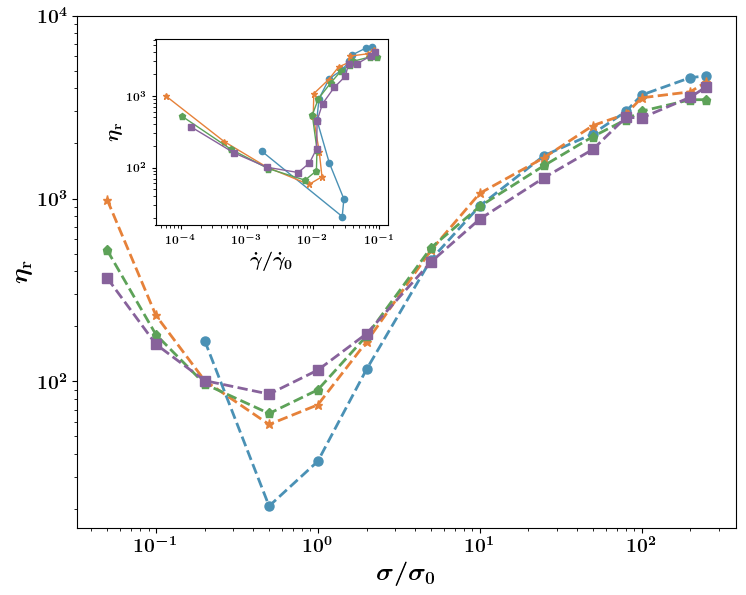

In [69]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt

# Setup
npp = 1000
vr  = '0.5'
phi = [0.765, 0.765, 0.77, 0.795]
ar  = [1.0, 1.4, 2.0, 4.0]
line_markers = ['o', '*', 'p', 's']
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']

stress  = ['0.05','0.1','0.2', '0.5', '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress1 = [float(s) for s in stress]

numRun = 1
off = 100

# Linux paths
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/flow_curves/'
# fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/'

# macOS paths
#topDir        = "/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves/"
#fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/'

# Create main figure and axes
fig, ax = plt.subplots(1, 2, figsize=(7.5, 6))

# Add inset manually (x0, y0, width, height in relative coordinates)
ax_inset = fig.add_axes([0.21, 0.62, 0.31, 0.31])  # top-left corner inset

for j, arj in enumerate(ar):
    visc     = [np.nan] * len(stress1)
    visc_std = [np.nan] * len(stress1)
    sr       = [np.nan] * len(stress1)
    sr_std   = [np.nan] * len(stress1)
    
    for s in range(len(stress)):
        workDir = f'{topDir}stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            data_array = np.loadtxt(file_name)
            if data_array.ndim != 1:
                data    = data_array[:, 3][off:]
                srvals  = data_array[:, 2][off:]
                visc[s] = np.mean(data) if len(data) > 0 else np.nan
                visc_std[s] = np.std(data) if len(data) > 0 else np.nan
                sr[s]   = np.mean(srvals) if len(srvals) > 0 else np.nan
                sr_std[s] = np.std(srvals) if len(srvals) > 0 else np.nan
    
    # Clean data
    stress_plot = [stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    visc_plot   = [visc[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    sr_plot     = [sr[i] for i in range(len(stress1)) if not np.isnan(visc[i])]

    # Main plot
    ax.plot(stress_plot, visc_plot, linestyle='--',
            marker = line_markers[j], label = rf'$\delta = {arj:.1f}$',
            color  = colors[j], linewidth = 2, markersize=6.5)

    # Inset plot (shear rate vs. viscosity)
    ax_inset.plot(sr_plot, visc_plot, linestyle='-', marker=line_markers[j],
                  color=colors[j], markersize=4.5)

# Main axis formatting
insetfontsize = 14
ax.set_xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=18, fontweight='bold', style='italic')
ax.set_ylabel(r'$\mathbf{\eta_r}$', fontsize=18, fontweight='bold', style='italic')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([0.1, 1, 10, 100])
ax.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
ax.set_yticks([100, 1000, 10000])
ax.set_yticklabels([r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=14, fontweight='bold')
#ax.legend(loc='lower right', fontsize=14, labelspacing=1.5, borderpad=1.2, framealpha=0.5)

# Inset formatting
#ax_inset.set_title('Shear rate vs. Viscosity', fontsize=8)
ax_inset.set_xlabel(r'$\mathbf{\dot \gamma/ \dot \gamma_{0}}$', fontsize=insetfontsize, fontweight='bold', style='italic')
ax_inset.set_ylabel(r'$\mathbf{\eta_r}$', fontsize=insetfontsize, fontweight='bold', style='italic')
ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.tick_params(labelsize=8, length=3, width=0.8)

######## 
## 2nd subplot
for j, arj in enumerate(ar):
    visc     = [np.nan for _ in stress1]
    visc_std = [np.nan for _ in stress1]
    
    for s in range(len(stress)):
        workDir = f'{topDir}/stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain      = data_array[:, 1]  # Extract the second column (usecols=1)
                    data        = data_array[:, 10][off:]
                    visc[s]     = (np.mean(data) if len(data) > 0 else np.nan)
                    visc_std[s] = (np.std(data) if len(data) > 0 else np.nan)
                else:
                    visc[s]     = np.nan
                    visc_std[s] = np.nan
    
    visc_plot     = [i for i in visc if not np.isnan(i)]
    visc_err_plot = [i for i in visc_std if not np.isnan(i)]
    stress_plot   = [ stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    plt.plot(stress_plot, visc_plot, linestyle='--', 
         marker=line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
         color=colors[j], linewidth=2, markersize=6)


ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

#plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\textbf{N}_{1}$', fontsize=18, fontweight='bold', style='italic')
#plt.title(r'$\phi/\phi_{m} \approx 0.97$', fontsize=22, fontweight='bold',  pad=12)
ax.legend(loc='upper left', fontsize=14, labelspacing=1.5, borderpad=1.2, framealpha=0.5)

plt.xscale('log')
plt.ylim([-150, 500])

plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

if True:
    figFormat=".pdf"
    plt.savefig(fig_save_path+ "flowcurve"+figFormat, bbox_inches="tight",dpi=600, transparent=False)
plt.show()

/tmp/ipykernel_1084439/259675302.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'{fig_save_path}/flowcurve_n1.pdf', bbox_inches="tight", dpi=600)
/home/rahul/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


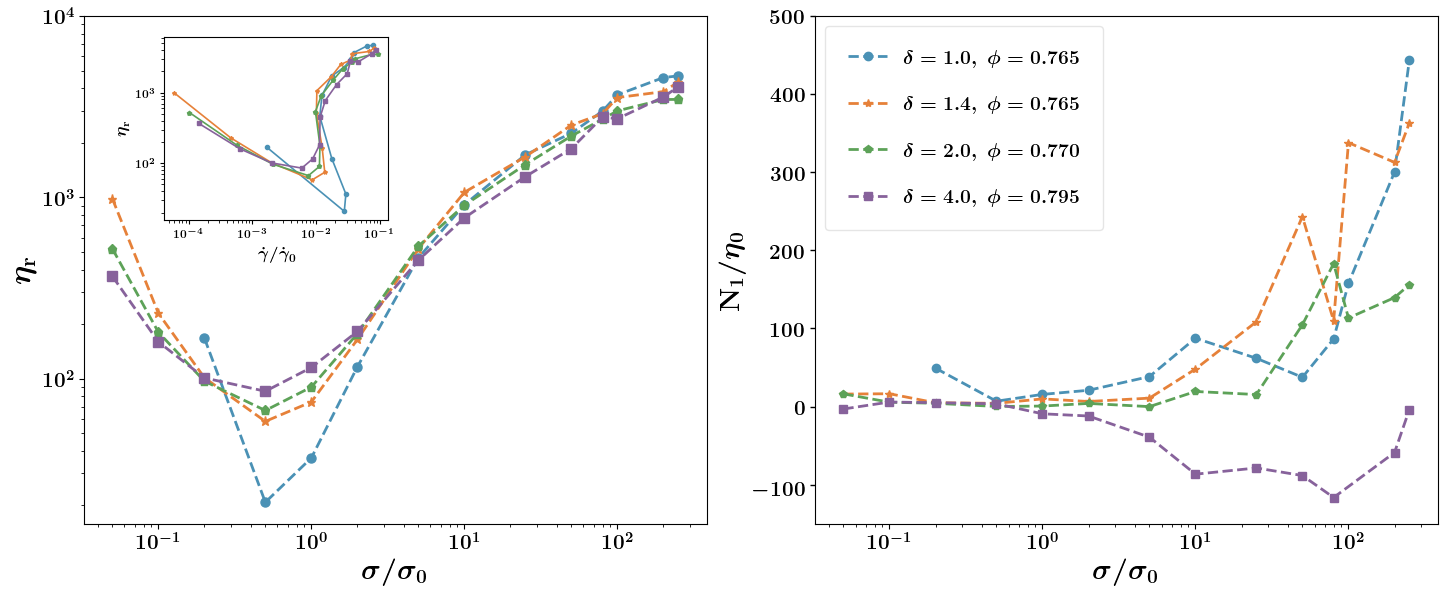

In [7]:
## Actual Fig 3

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Parameters ---
npp      = 1000
vr       = '0.5'
phi_vals = [0.765, 0.765, 0.77, 0.795]
ar_vals  = [1.0, 1.4, 2.0, 4.0]
off      = 100
numRun   = 1

line_markers  = ['o', '*', 'p', 's']
colors        = ['#4a91b5', '#e68139', '#5da258', '#87629b']
stress        = ['0.05','0.1','0.2','0.5','1','2','5','10','25','50','80','100','200','250']
stress_floats = [float(s) for s in stress]

# --- Setup figure ---
fig, axs = plt.subplots(1, 2, figsize=(7.25826*2,6))
ax_main, ax_n1 = axs
ax_inset = inset_axes(ax_main, width="30%", height="30%", loc='upper left', 
                      bbox_to_anchor=(0.12, -.23, 1.2, 1.2), bbox_transform=ax_main.transAxes)

# --- Loop over aspect ratios ---
for j, (arj, phij) in enumerate(zip(ar_vals, phi_vals)):
    visc, visc_std, sr, sr_std = [np.nan]*len(stress), [np.nan]*len(stress), [np.nan]*len(stress), [np.nan]*len(stress)

    for i, s in enumerate(stress):    
        path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        try:
            file = glob.glob(f'{path}/data_*.dat')[0]
            data = np.loadtxt(file)
            if data.ndim > 1:
                visc[i] = np.mean(data[off:, 3])
                visc_std[i] = np.std(data[off:, 3])
                sr[i] = np.mean(data[off:, 2])
                sr_std[i] = np.std(data[off:, 2])
        except (IndexError, FileNotFoundError):
            continue

    # Filter NaNs
    mask = ~np.isnan(visc)
    stress_plot = np.array(stress_floats)[mask]
    visc_plot = np.array(visc)[mask]
    sr_plot = np.array(sr)[mask]

    # Plot viscosity vs stress (main plot)
    ax_main.plot(stress_plot, visc_plot, '--', marker=line_markers[j],
                 color=colors[j], label=rf'$\delta = {arj:.1f}, \; \phi = {phij}$', linewidth=2, markersize=6.5)

    # Plot viscosity vs shear rate (inset)
    ax_inset.plot(sr_plot, visc_plot, '-', marker=line_markers[j],
                  color=colors[j], markersize=3, linewidth=1.2)

# --- Format ax_main ---
labelsize = 20
ticksize = 15
ax_main.set(xscale='log', yscale='log')
ax_main.set_xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=labelsize, fontweight='bold', style='italic')
ax_main.set_ylabel(r'$\mathbf{\eta_r}$', fontsize=22, fontweight='bold', style='italic')
ax_main.set_xticks([0.1, 1, 10, 100])
ax_main.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=ticksize, fontweight='bold')
ax_main.set_yticks([100, 1000, 10000])
ax_main.set_yticklabels([r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=ticksize, fontweight='bold')

# --- Format inset ---
ax_inset.set(xscale='log', yscale='log')
ax_inset.set_xlabel(r'$\mathbf{\dot \gamma/ \dot \gamma_{0}}$', fontsize=12, fontweight='bold', style='italic')
ax_inset.set_ylabel(r'$\mathbf{\eta_r}$', fontsize=12, fontweight='bold', style='italic')
ax_inset.tick_params(labelsize=8, length=3, width=0.8)

# --- Second subplot (N1 vs stress) ---
for j, (arj, phij) in enumerate(zip(ar_vals, phi_vals)):
    n1, n1_std = [np.nan]*len(stress), [np.nan]*len(stress)
    
    for i, s in enumerate(stress):
        if arj == 4 and s == '100':
            path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_2'
        else:
            path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        #path = f'{topDir}stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        
        try:
            file = glob.glob(f'{path}/data_*.dat')[0]
            data = np.loadtxt(file)
            if data.ndim > 1:
                n1[i] = np.mean(data[off:, 10])
                n1_std[i] = np.std(data[off:, 10])
        except (IndexError, FileNotFoundError):
            continue

    mask = ~np.isnan(n1)
    stress_plot = np.array(stress_floats)[mask]
    n1_plot = np.array(n1)[mask]

    ax_n1.plot(stress_plot, n1_plot, '--', marker=line_markers[j],
               color=colors[j], label=rf'$\delta = {arj:.1f}, \; \phi = {phij:.3f}$', linewidth=2, markersize=6)


# --- Format ax_n1 ---
ax_n1.set(xscale='log')
ax_n1.set_ylim([-150, 500])
ax_n1.set_xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=labelsize, fontweight='bold', style='italic')
ax_n1.set_ylabel(r'$\textbf{N}_{1}/\eta_0$', fontsize=labelsize, fontweight='bold', style='italic')
ax_n1.set_xticks([0.1, 1, 10, 100])
ax_n1.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=ticksize, fontweight='bold')
ax_n1.tick_params(axis='y', labelsize=ticksize, width=1)

# --- Add legends ---
#ax_main.legend(loc='lower right', fontsize=14, labelspacing=1.5, borderpad=1.2, framealpha=0.5)
ax_n1.legend(loc='upper left', fontsize=14, labelspacing=1.5, borderpad=1.2, framealpha=0.5)

# --- Save and show ---
#plt.tight_layout()
if True:
    plt.savefig(f'{fig_save_path}/flowcurve_n1.pdf', bbox_inches="tight", dpi=600)
    
plt.show()

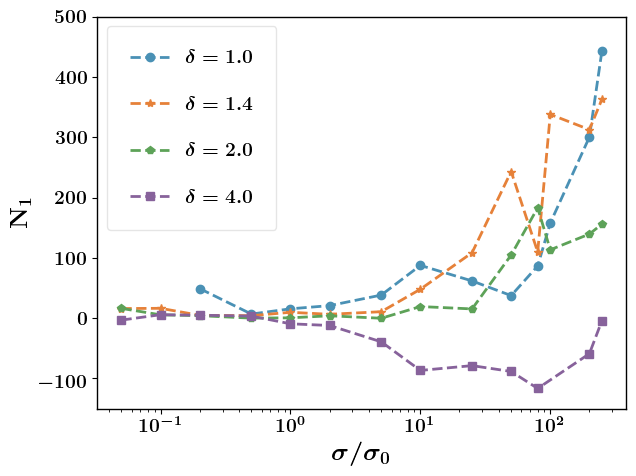

In [50]:
## N1 curve for stress controlled sims (for new data)

## phi/phim = 0.97

npp = 1000
vr  = '0.5'
# below lists should be of the same length
phi = [0.765, 0.765, 0.77, 0.795]
ar  = [1.0, 1.4, 2.0, 4.0]

numRun = 1
line_markers = ['o', '*', 'p', 's']

stress  = ['0.05','0.1','0.2', '0.5', '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress1 = [float(s) for s in stress]

off    = 100
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']

for j, arj in enumerate(ar):
    visc     = [np.nan for _ in stress1]
    visc_std = [np.nan for _ in stress1]
    
    for s in range(len(stress)):
        if arj == 4 and stress[s] == '100':
            workDir = f'{topDir}/flow_curves/stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_1'
        else:
            workDir = f'{topDir}/flow_curves/stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'

            if os.path.exists(workDir):
                file_name = glob.glob(f'{workDir}/data_*.dat')[0]
                with open(f'{file_name}','r') as file:
                    data_array = np.loadtxt(file)  # Load all data into a 2D array
                    if data_array.ndim != 1:
                        strain      = data_array[:, 1]  # Extract the second column (usecols=1)
                        data        = data_array[:, 10][off:]
                        visc[s]     = (np.mean(data) if len(data) > 0 else np.nan)
                        visc_std[s] = (np.std(data) if len(data) > 0 else np.nan)
                    else:
                        visc[s]     = np.nan
                        visc_std[s] = np.nan
    
    visc_plot     = [i for i in visc if not np.isnan(i)]
    visc_err_plot = [i for i in visc_std if not np.isnan(i)]
    stress_plot   = [ stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    plt.plot(stress_plot, visc_plot, linestyle='--', 
         marker=line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
         color=colors[j], linewidth=2, markersize=6)


ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

#plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\textbf{N}_{1}$', fontsize=18, fontweight='bold', style='italic')
#plt.title(r'$\phi/\phi_{m} \approx 0.97$', fontsize=22, fontweight='bold',  pad=12)
ax.legend(loc='upper left', fontsize=14, labelspacing=1.5, borderpad=1.2, framealpha=0.5)

plt.xscale('log')
plt.ylim([-150, 500])

plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
    
plt.tight_layout()

if False:
    figFormat=".pdf"
    plt.savefig(fig_save_path+ "n1_flowcurve"+figFormat, bbox_inches="tight",dpi=500, transparent=True)

plt.show()

## Figure 6

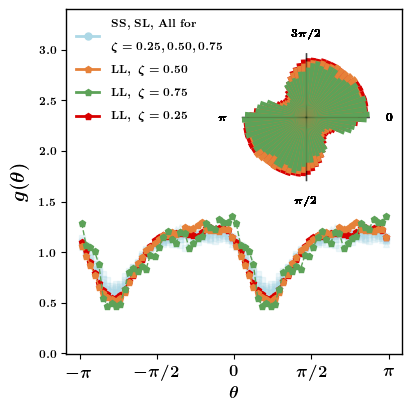

In [30]:
# angular contact
#matplotlib.use('Agg')
#phi/phim = 0.97

ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'

colors = [
    ['#ADD8E6', '#ADD8E6', '#ADD8E6', '#D80000'],  # red last
    ['#ADD8E6', '#ADD8E6', '#ADD8E6', '#e68139'],  # orange last
    ['#ADD8E6', '#ADD8E6', '#ADD8E6', '#5da258']   # green last
]

linestyles  = ['None', 'None', 'None', '--']

ar       = '1.4'
phival   = { ('0.25', '1.4'): '0.76', ('0.5', '1.4'): '0.76', ('0.75', '1.4'): '0.77',
           ('0.25', '4.0'): '0.80', ('0.5', '4.0'): '0.80', ('0.75', '4.0'): '0.78' }
vr       = ['0.25', '0.5', '0.75']
numRuns  = 2
npp      = 1000 # no. of particles
off      = 100  # steady state cut off

fig, ax = plt.subplots(figsize = (4, 4), constrained_layout=True)
for j, vrj in enumerate(vr):
    phii = phival[(vrj, ar)]
    sizePair            = ['Total', 'SS', 'SL', 'LL']
    zorderVal           = [0, 1, 2]
    line_markers        = ['o', 's', '^', 'p']
    contactAngleAllRuns = [[] for _ in range(len(sizePair))] # empty nested list for all four runs 

    dataname = f'{topDir}NP_{npp}/phi_{phii}/ar_{ar}/Vr_{vrj}'
    if os.path.exists(dataname):
        for l in range(numRuns):
            ranFile      = open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r')
            particleSize = particleSizeList(ranFile, sizeRatio = float(ar)) 

            interFile    = open(f'{dataname}/run_{l+1}/{intFile}', 'r')
            contactList  = interactionsList(interFile) 

            contactAngleTotal = [[] for _ in range(len(sizePair))]
            for sampleList in contactList[off:]:
                timeStepContactAngle = [[] for _ in range(len(sizePair))] 
                for i in range (sampleList.shape[0]):
                    particleSize1 = particleSize[int(sampleList[i, 0])]
                    particleSize2 = particleSize[int(sampleList[i, 1])]
                    contState     = int(sampleList[i, 10])
                    thetaRad      = np.arctan2(sampleList[i,4],sampleList[i,2])

                    if contState == 2:
                        updateContAngle(thetaRad, timeStepContactAngle[0])
                        if (particleSize1 == particleSize2 == 1):
                            updateContAngle(thetaRad, timeStepContactAngle[1])
                        elif (particleSize1 != particleSize2):
                            updateContAngle(thetaRad, timeStepContactAngle[2])
                        elif (particleSize1 == particleSize2 > 1):
                            updateContAngle(thetaRad, timeStepContactAngle[3])

                for m in range(len(contactAngleTotal)):
                    contactAngleTotal[m].append(timeStepContactAngle[m])

            for n in range(len(contactAngleAllRuns)):
                contactAngleList = [i for sub in contactAngleTotal[n] for i in sub]
                contactAngleAllRuns[n].append(contactAngleList)

    for im in range(len(contactAngleAllRuns)):
        allContactAngles  = [i for sub in contactAngleAllRuns[im] for i in sub]
        counts, bin_edges = np.histogram(allContactAngles, bins = 72, density = True)
        bin_centers       = (bin_edges[:-1] + bin_edges[1:]) / 2
        countsAvg         = np.mean(counts)
        zorder_mapping    = {
        '#D80000': 1,
        '#e68139': 2,
        '#5da258': 3,
        '#ADD8E6': 0
        }
        plot_color       = colors[j][im]
        zorder_value     = zorder_mapping.get(plot_color, 1)
        marker_alpha     = 0.2 if plot_color == '#ADD8E6' else 1.0
        markersize_value = 4.5
        ax.plot( 
            bin_centers, counts / countsAvg, linestyle=linestyles[im], 
            marker=line_markers[im], markersize=markersize_value, alpha=marker_alpha,
            label=fr'\textbf{{{sizePair[im]}}}', color=plot_color, 
            zorder=zorder_value)
        
        ax_inset = fig.add_axes([0.59, 0.56, 0.32, 0.32], projection='polar')  # polar projection for circular plot
        width    = 2 * np.pi / len(bin_centers)  # Bar width based on number of angles
        if im == 3:
            bars     = ax_inset.bar(bin_centers, counts / countsAvg * 0.8, width=width, color=plot_color, alpha=1, zorder=zorderVal[j])
        ax_inset.set_ylim(0, np.max(counts / countsAvg) * 1.1)  # Adjust radial limits if necessary
        ax_inset.set_theta_zero_location("E")  # Set 0 at East
        ax_inset.set_theta_direction(-1)  # 
        ax_inset.grid(False)
        ax_inset.set_frame_on(False)
        ax_inset.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])  # Set desired angles
        ax_inset.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$"], fontsize=8, weight='normal')  # Custom labels
        ax_inset.set_yticklabels([])  # No radial ticks or labels
        ax_inset.set_yticks([])
        ax_inset.plot([0, 0], [0, np.max(counts / countsAvg) * 1.1], color='black', alpha=0.1)  # Vertical line at 0
        ax_inset.plot([np.pi/2, np.pi/2], [0, np.max(counts / countsAvg) * 1.1], color='black', alpha=0.1)  # Vertical line at π/2
        ax_inset.plot([np.pi, np.pi], [0, np.max(counts / countsAvg) * 1.1], color='black', alpha=0.1)  # Vertical line at π
        ax_inset.plot([3*np.pi/2, 3*np.pi/2], [0, np.max(counts / countsAvg) * 1.1], color='black', alpha=0.1)  # Vertical line at 3π/2
        ax_inset.set_rmax(np.max(counts / countsAvg) * 0.8)

line_1 = Line2D([0], [0], color='#D80000', lw=2, marker='p', label=r'$\textbf{LL}, \; \zeta = 0.25$')
line_2 = Line2D([0], [0], color='#e68139', lw=2, marker='p', label=r'$\textbf{LL}, \; \zeta = 0.50$')
line_3 = Line2D([0], [0], color='#5da258', lw=2, marker='p', label=r'$\textbf{LL}, \; \zeta = 0.75$')
line_4 = Line2D([0], [0], color='#ADD8E6', lw=2, marker='o', 
                label=r'$\textbf{SS, SL, All for}$' + '\n\n' + r'$\zeta = 0.25, 0.50, 0.75$')

ax.plot([], [], color='red', lw=2)  # Just for illustration
ax.plot([], [], color='orange', lw=2)
ax.plot([], [], color='green', lw=2)
ax.plot([], [], color='green', lw=2)
ax.legend(handles=[line_4, line_2, line_3, line_1], loc='upper left',
          handletextpad=1.1, labelspacing=1.2, fontsize=8, frameon=False)

xticks       = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
xtick_labels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
ax.set_xticks(xticks, xtick_labels, fontsize = 12)
ax.set_xlabel(r'$\theta$',  fontsize = 12)
ax.set_ylabel(r'$g(\theta)$', fontsize = 14, labelpad=7) 
#ax.set_title(fr'$\mathbf{{\delta = {ar}}}$', fontsize = 13, pad=8)
#ax.grid(True, alpha=0.3, axis='both', which='both')
ax.set_ylim(-0.01, 3.4)

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_linewidth(1)

plt.savefig(f'{fig_save_path}cont_pair_dist_{ar}.pdf', bbox_inches="tight",dpi=500, transparent=False)
plt.show()

In [3]:
def updateContAngle(theta, contList):
    '''
    This function to calulated the complementary contact angle and append to 
    relevant list (contList)

    Inputs:
    theta    - primary contact angle. Calculated by arctan2(nz,nx)
    contList - list where the angle appends. This list contains all the contact angle for one case, all runs
    '''
    contList.append(theta)
    if theta < 0:
        contList.append(np.pi - abs(theta))
    else:
        contList.append(theta - np.pi)

def particleSizeList(randomSeedFile, sizeRatio, npp = 1000):
    '''
    This function reads the random seed file and creates
    a list of particle sizes. The list index is the particle index.

    Inputs:
    randomSeedFile - location for the random seed file. It contains the particle index and sizes
    sizeRatio      - delta or ar for the case
    npp            - system size
    '''

    if sizeRatio == 1:
        # Painting particles randomly in two colours for monodisperse case.
        particleSize = [1]*(int(npp/2)) + [2]*(int(npp/2))
        random.shuffle(particleSize)
    else:
        particleSize = np.loadtxt(randomSeedFile, usecols = 3) # reading only column 3 which has particle size
        randomSeedFile.close()
    return particleSize

mean for SS, zeta: 0.25 = 14897.1667, total contacts = 1072596
mean for SL, zeta: 0.25 = 61036.9167, total contacts = 4394658
mean for LL, zeta: 0.25 = 59125.3889, total contacts = 4257028
mean for SS, zeta: 0.50 = 48706.2222, total contacts = 3506848
mean for SL, zeta: 0.50 = 65962.9722, total contacts = 4749334
mean for LL, zeta: 0.50 = 20538.6389, total contacts = 1478782
mean for SS, zeta: 0.75 = 46817.8333, total contacts = 3370884
mean for SL, zeta: 0.75 = 20692.7778, total contacts = 1489880
mean for LL, zeta: 0.75 = 2036.1944, total contacts = 146606


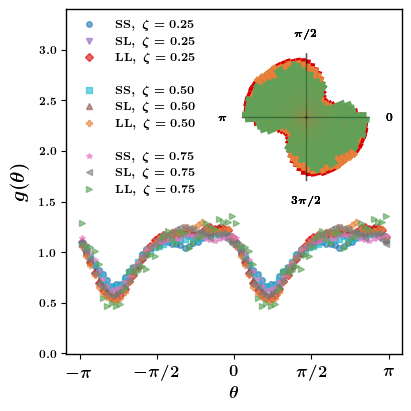

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.lines as mlines

# your existing helper functions: particleSizeList, interactionsList, updateContAngle, etc.

# Plot settings
ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'

# Use unique colors and markers for each (vr, sizePair) combination
colors_markers = [
    ('#1f77b4', 'o'),   # SS, 0.25 – blue circle
    ('#9467bd', 'v'),   # SL, 0.25 – purple triangle down
    ('#D80000', 'D'),   # LL, 0.25 – red diamond

    ('#17becf', 's'),   # SS, 0.5  – cyan square
    ('#8c564b', '^'),   # SL, 0.5  – brown triangle up
    ('#e68139', 'P'),   # LL, 0.5  – orange plus-filled

    ('#e377c2', '*'),   # SS, 0.75 – pink star
    ('#7f7f7f', '<'),   # SL, 0.75 – gray triangle left
    ('#5da258', '>')    # LL, 0.75 – green triangle right
]

ar       = '1.4'
phival   = { ('0.25', '1.4'): '0.76', ('0.5', '1.4'): '0.76', ('0.75', '1.4'): '0.77',
             ('0.25', '4.0'): '0.80', ('0.5', '4.0'): '0.80', ('0.75', '4.0'): '0.78' }
vr       = ['0.25', '0.5', '0.75']
numRuns  = 2
npp      = 1000
off      = 100

sizePair = ['SS', 'SL', 'LL']  # Exclude 'Total'
fig, ax  = plt.subplots(figsize=(4, 4), constrained_layout=True)

plot_id  = 0  # For mapping to colors/markers
legend_handles = [] 

for j, vrj in enumerate(vr):
    phii                = phival[(vrj, ar)]
    contactAngleAllRuns = [[] for _ in range(len(sizePair))]

    dataname = f'{topDir}/NP_{npp}/phi_{phii}/ar_{ar}/Vr_{vrj}'
    if os.path.exists(dataname):
        for l in range(numRuns):
            with open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r') as ranFile:
                particleSize = particleSizeList(ranFile, sizeRatio=float(ar), npp=npp)

            with open(f'{dataname}/run_{l+1}/{intFile}', 'r') as interFile:
                contactList  = readFiles.interactionsList(interFile)

            contactAngleTotal = [[] for _ in range(len(sizePair))]
            for sampleList in contactList[off:]:
                timeStepContactAngle = [[] for _ in range(len(sizePair))]
                for i in range(sampleList.shape[0]):
                    ps1 = particleSize[int(sampleList[i, 0])]
                    ps2 = particleSize[int(sampleList[i, 1])]
                    contState = int(sampleList[i, 10])
                    thetaRad  = np.arctan2(sampleList[i, 4], sampleList[i, 2])

                    if contState == 2:
                        if ps1 == ps2 == 1:
                            updateContAngle(thetaRad, timeStepContactAngle[0])  # SS
                        elif ps1 != ps2:
                            updateContAngle(thetaRad, timeStepContactAngle[1])  # SL
                        elif ps1 == ps2 > 1:
                            updateContAngle(thetaRad, timeStepContactAngle[2])  # LL

                for m in range(len(sizePair)):
                    contactAngleTotal[m].append(timeStepContactAngle[m])

            for n in range(len(sizePair)):
                flattened = [i for sub in contactAngleTotal[n] for i in sub]
                contactAngleAllRuns[n].append(flattened)

    for im in range(len(sizePair)):
        allAngles         = [i for sub in contactAngleAllRuns[im] for i in sub]
        counts, bin_edges = np.histogram(allAngles, bins=72, density=False)
        bin_centers       = (bin_edges[:-1] + bin_edges[1:]) / 2
        countsAvg         = np.mean(counts)
        print(f'mean for {sizePair[im]}, zeta: {float(vrj):.2f} = {countsAvg:.4f}, total contacts = {np.sum(counts)}')
        color, marker = colors_markers[plot_id]
        #linestyle1, alpha1, markersize1 = ('--', 1, 4.5) if sizePair[im] == 'LL' else (None, 0.2, 4)
        
        ax.plot(bin_centers, counts / countsAvg,
                linestyle='None', marker = marker, markersize = 4,
                color = color, alpha = 0.6,
                label = fr'$\textbf{{{sizePair[im]}}},\ \zeta = {float(vrj):.2f}$')
        
        # Inset only for LL
        if sizePair[im] == 'LL':
            ax_inset = fig.add_axes([0.59, 0.56, 0.32, 0.32], projection='polar')
            width    = 2 * np.pi / len(bin_centers)
            ax_inset.bar(bin_centers, counts / countsAvg * 0.8, width=width, color=color, alpha=1)
            ax_inset.set_ylim(0, np.max(counts / countsAvg) * 1.1)
            ax_inset.set_theta_zero_location("E")
            ax_inset.set_theta_direction(1)  # ⬅ ANTICLOCKWISE
            ax_inset.grid(False)
            ax_inset.set_frame_on(False)
            ax_inset.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
            ax_inset.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$"], fontsize=8)
            ax_inset.set_yticklabels([])
            ax_inset.set_yticks([])
            
            for angle in [0, np.pi/2, np.pi, 3*np.pi/2]:
                ax_inset.plot([angle, angle], [0, np.max(counts / countsAvg) * 1.2], color='black', alpha=0.3)
            ax_inset.set_rmax(np.max(counts / countsAvg) * 0.8)

        plot_id += 1
        
    ax.plot([], [], ' ', label=" ") 

# Final plot formatting
ax.set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'], fontsize=12)
ax.set_xlabel(r'$\theta$', fontsize=12)
ax.set_ylabel(r'$g(\theta)$', fontsize=14, labelpad=7)
ax.set_ylim(-0.01, 3.4)

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_linewidth(1)

ax.legend(fontsize=8.5, frameon=False, loc='upper left', handletextpad=1.2)

#plt.savefig(f'{fig_save_path}cont_pair_dist_{ar}.pdf', bbox_inches="tight", dpi=500)
plt.show()

mean for SS, zeta: 0.25 = 36580.7778, total contacts = 2633816
mean for SL, zeta: 0.25 = 53876.7500, total contacts = 3879126
mean for LL, zeta: 0.25 = 8982.3333, total contacts = 646728
mean for SS, zeta: 0.50 = 87088.8056, total contacts = 6270394
mean for SL, zeta: 0.50 = 33893.8056, total contacts = 2440354
mean for LL, zeta: 0.50 = 1181.6389, total contacts = 85078
mean for SS, zeta: 0.75 = 119846.3611, total contacts = 8628938
mean for SL, zeta: 0.75 = 13710.3333, total contacts = 987144
mean for LL, zeta: 0.75 = 163.5278, total contacts = 11774


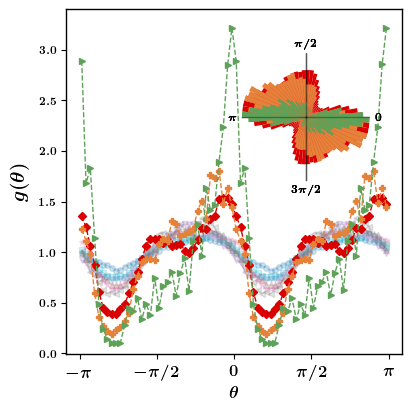

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'

# Updated colors and markers for 9 combinations (SS, SL, LL for Vr = 0.25, 0.5, 0.75)
colors_markers = [
    ('#1f77b4', 'o'),   # SS, 0.25 – blue circle
    ('#9467bd', 'v'),   # SL, 0.25 – purple triangle down
    ('#D80000', 'D'),   # LL, 0.25 – red diamond

    ('#17becf', 's'),   # SS, 0.5 – cyan square
    ('#8c564b', '^'),   # SL, 0.5 – brown triangle up
    ('#e68139', 'P'),   # LL, 0.5 – orange plus-filled

    ('#e377c2', '*'),   # SS, 0.75 – pink star
    ('#7f7f7f', '<'),   # SL, 0.75 – gray triangle left
    ('#5da258', '>')    # LL, 0.75 – green triangle right
]

# Parameters
ar       = '4.0'
phival   = {('0.25', '1.4'): '0.76', ('0.5', '1.4'): '0.76', ('0.75', '1.4'): '0.77',
            ('0.25', '4.0'): '0.80', ('0.5', '4.0'): '0.80', ('0.75', '4.0'): '0.78' }
vr       = ['0.25', '0.5', '0.75']
numRuns  = 2
npp      = 1000
off      = 100

fig, ax  = plt.subplots(figsize=(4, 4), constrained_layout=True)

for j, vrj in enumerate(vr):
    phii = phival[(vrj, ar)]
    sizePair = ['SS', 'SL', 'LL']
    contactAngleAllRuns = [[] for _ in range(len(sizePair))]

    dataname = f'{topDir}/NP_{npp}/phi_{phii}/ar_{ar}/Vr_{vrj}'
    if os.path.exists(dataname):
        for l in range(numRuns):
            with open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r') as ranFile:
                particleSize = particleSizeList(ranFile, sizeRatio=float(ar), npp=npp)

            with open(f'{dataname}/run_{l+1}/{intFile}', 'r') as interFile:
                contactList = readFiles.interactionsList(interFile)

            contactAngleTotal = [[] for _ in range(len(sizePair))]
            for sampleList in contactList[off:]:
                timeStepContactAngle = [[] for _ in range(len(sizePair))]
                for i in range(sampleList.shape[0]):
                    particleSize1 = particleSize[int(sampleList[i, 0])]
                    particleSize2 = particleSize[int(sampleList[i, 1])]
                    contState = int(sampleList[i, 10])
                    thetaRad = np.arctan2(sampleList[i, 4], sampleList[i, 2])

                    if contState == 2:
                        if (particleSize1   == particleSize2 == 1):
                            updateContAngle(thetaRad, timeStepContactAngle[0])
                        elif (particleSize1 != particleSize2):
                            updateContAngle(thetaRad, timeStepContactAngle[1])
                        elif (particleSize1 == particleSize2 > 1):
                            updateContAngle(thetaRad, timeStepContactAngle[2])

                for m in range(len(contactAngleTotal)):
                    contactAngleTotal[m].append(timeStepContactAngle[m])

            for n in range(len(contactAngleAllRuns)):
                contactAngleList = [i for sub in contactAngleTotal[n] for i in sub]
                contactAngleAllRuns[n].append(contactAngleList)
    
    zorder_mapping = {'#D80000': 1, '#e68139': 2, '#5da258': 3}

    for i in range(len(contactAngleAllRuns)):
        allContactAngles  = [i for sub in contactAngleAllRuns[i] for i in sub]
        counts, bin_edges = np.histogram(allContactAngles, bins=72, density=False)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        countsAvg   = np.mean(counts)
        print(f'mean for {sizePair[i]}, zeta: {float(vrj):.2f} = {countsAvg:.4f}, total contacts = {np.sum(counts)}')

        index = j * 3 + i
        plot_color, marker = colors_markers[index]
        
        linestyle1, alpha1, markersize1 = ('--', 1, 4.5) if sizePair[i] == 'LL' else (None, 0.2, 4)
        zorder_value = zorder_mapping.get(plot_color, 0)
        
        ax.plot(bin_centers, counts / countsAvg, linestyle = linestyle1, 
                marker = marker, markersize = markersize1, alpha = alpha1,
                label  = fr'{sizePair[i]}, Vr = {vrj}', color = plot_color,
                zorder = zorder_value)

        if i == 2:  # Only for LL, plot inset
            #print('plot')
            ax_inset = fig.add_axes([0.59, 0.56, 0.32, 0.32], projection='polar')
            width    = 2 * np.pi / len(bin_centers)
            bars     = ax_inset.bar(bin_centers, counts / countsAvg * 0.8, width=width, color=plot_color, alpha=1)
            ax_inset.set_ylim(0, np.max(counts / countsAvg) * 1.1)
            ax_inset.set_theta_zero_location("E")
            ax_inset.set_theta_direction(1)  # counter-clockwise
            ax_inset.grid(False)
            ax_inset.set_frame_on(False)
            ax_inset.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
            ax_inset.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$"], fontsize=8, weight='normal')
            ax_inset.tick_params(axis = 'x', pad = -4)
            ax_inset.set_yticklabels([])
            ax_inset.set_yticks([])
            for angle in [0, np.pi/2, np.pi, 3*np.pi/2]:
                ax_inset.plot([angle, angle], [0, np.max(counts / countsAvg) * 1.2], color='black', alpha=0.3)
            ax_inset.set_rmax(np.max(counts / countsAvg) * 0.8)

xticks       = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
xtick_labels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, fontsize=12)
ax.set_xlabel(r'$\theta$', fontsize=12)
ax.set_ylabel(r'$g(\theta)$', fontsize=14, labelpad=7)
ax.set_ylim(-0.01, 3.4)

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_linewidth(1)

#ax.legend(fontsize=7, loc='upper right', frameon=False, ncol=1)
#plt.savefig(f'{fig_save_path}cont_pair_dist_{ar}.pdf', bbox_inches="tight", dpi=500, transparent=False)
plt.show()

### Figure 7 PDF plot

In [2]:
plt.close('all')
plt.rcParams.update({
  'figure.max_open_warning' : 0,
  'text.usetex'             : True,
  'figure.autolayout'       : True,
  'font.family'             : "STIXGeneral",
  'mathtext.fontset'        : "stix",
  'font.size'               : 10,
  'axes.titlesize'          : 10,
  'figure.labelsize'        : 10,
  'figure.titlesize'        : 10,
  'legend.fontsize'         : 10,
  'legend.handlelength'     : 1,
  'legend.handletextpad'    : 0.5,
  'legend.borderpad'        : 0.5,
  'legend.borderaxespad'    : 0.5,
  'legend.columnspacing'    : 1,
  'legend.framealpha'       : 1,
  'legend.fancybox'         : True,
  'axes.grid'               : True,
  'axes.grid.axis'          : 'both',
  'grid.alpha'              : 0.2,
  'grid.linewidth'          : 0.4,
  'xtick.labelsize'         : 10,
  'ytick.labelsize'         : 10,
  'lines.linewidth'         : 1,
  'lines.markersize'        : 5,
  'savefig.transparent'     : True,
  'savefig.pad_inches'      : 0.01,
  'savefig.format'          : 'pdf',
  'savefig.bbox'            : 'tight'
})
plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"

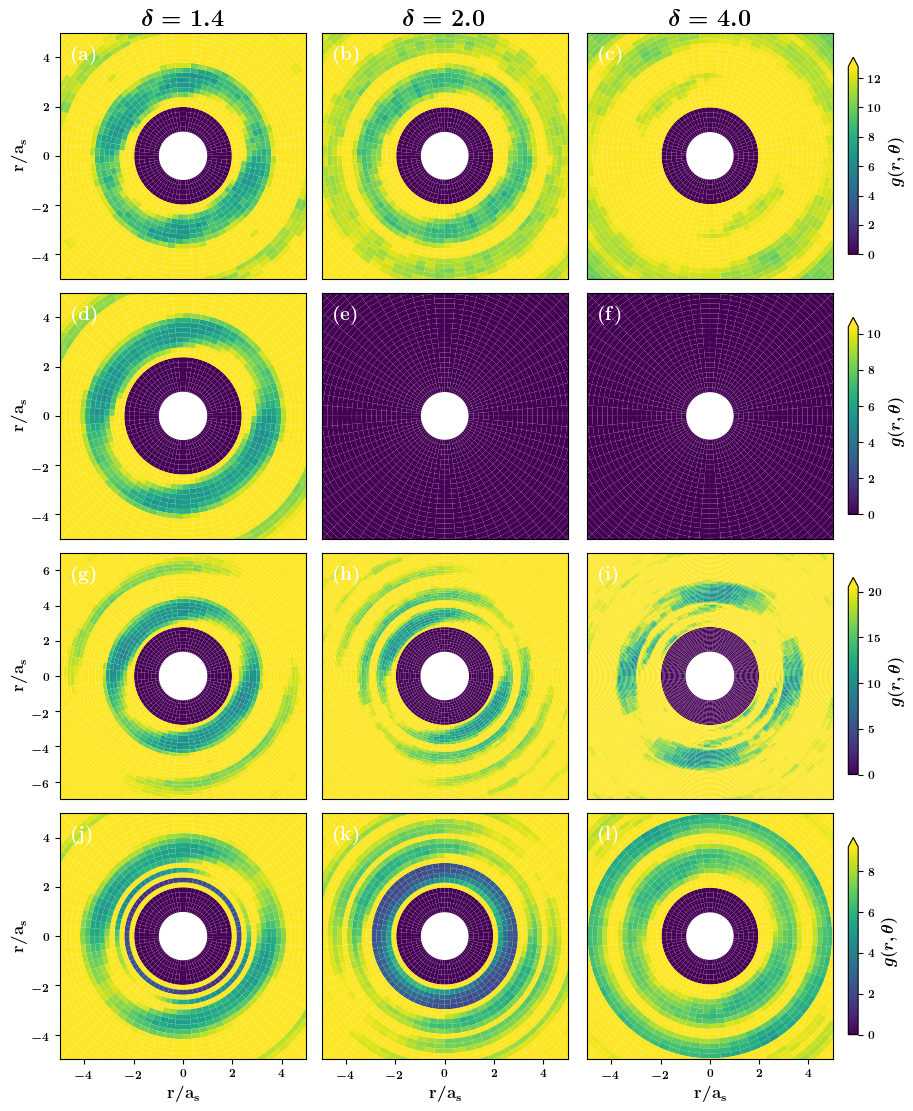

In [33]:
import matplotlib.gridspec as gridspec
from matplotlib.patches import Wedge    # type:ignore 

# Simulation data mount point and figure save path.

#mac
topDir        = "/Volumes/rahul_2TB/high_bidispersity/new_data"
fig_save_path = "/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/"

#linux
# topDir        = "/media/rahul/rahul_2TB/high_bidispersity/new_data"
# fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/"

# Some simulation parameters.
npp      = 1000
numRun   = 1

# for vr = 0.25
vr  = '0.25'
phi = [0.76, 0.77, 0.795]
ar  = [1.4, 2.0, 4.0]

# for vr = 0.25
# vr  = '0.75'
# phi = [0.77, 0.77, 0.78]
# ar  = [1.4, 2.0, 4.0]

sizePairs  = ['ss', 'sl', 'll', 'all']
label_list = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', 
              '(g)', '(h)', '(i)', '(j)', '(k)', '(l)']

fig = plt.figure(figsize=(9, 11), constrained_layout =True)  # Enable constrained layout
gs  = gridspec.GridSpec(len(sizePairs), len(phi), figure=fig, hspace=0.05, wspace=0.02)  # Remove hspace & wspace (handled automatically)
ax  = [[fig.add_subplot(gs[i, j]) for j in range(len(phi))] for i in range(len(sizePairs))]

kk = -1
for i, sizePair in enumerate(sizePairs):
    g_r_theta_row = []
    for j, phij in enumerate(phi):
        phir = '{:.3f}'.format(phij) if len(str(phij).split('.')[1]) > 2 else '{:.2f}'.format(phij)
        arj  = ar[j]
        dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(dataname): 
            datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
            rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
            thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
            g_r_theta = np.genfromtxt(datFile, skip_header=5)
                
            ds    = arj if sizePair == 'll' else 1 # unit distance
            plim  = 5 # going upto certain particles far
            tdist = ds*plim
            rlim  = np.abs(rbin - tdist*np.sqrt(2)*1.1).argmin() # closest index from plim*ds
            #r1    = np.abs(rbin - ds*np.sqrt(2)*1.1).argmin()
            
            for ii in range(len(rbin[0:rlim]) - 1):
                for jj in range(len(thetabin) - 1):
                    theta_start = np.degrees(thetabin[jj])
                    theta_end   = np.degrees(thetabin[jj + 1])
                    r_start     = rbin[ii]
                    r_end       = rbin[ii + 1]
    
                    g_r_theta_row.append(g_r_theta[ii, jj])
                    wedge = Wedge(
                        (0, 0), r_end, theta_start, theta_end,
                        width     = r_end - r_start,
                        facecolor = plt.cm.viridis(g_r_theta[ii, jj]),
                        edgecolor = 'none',
                        transform = ax[i][j].transData._b)
                    ax[i][j].add_patch(wedge)
                    
            ax[i][j].set_aspect('equal')
            ax[i][j].set_xlim([-tdist, tdist])
            ax[i][j].set_ylim([-tdist, tdist])
            ax[i][j].grid(False)
            ax[0][j].set_title(fr'${{\delta = {arj}}}$', fontsize=17, pad=5)
            ax[i][0].set_ylabel(r'$\mathbf{r / a_{s}}$', fontsize=12)
            ax[-1][j].set_xlabel(r'$\mathbf{r / a_{s}}$', fontsize=12)

            if j != 0:
                ax[i][j].set_yticklabels([])
                ax[i][j].set_yticks([])

            if sizePair != sizePairs[-1]:
                ax[i][j].set_xticklabels([])
                ax[i][j].set_xticks([])

            kk += 1
            ax[i][j].text(0.05, 0.95, r'\textbf{' + label_list[kk] + '}', 
                          transform=ax[i][j].transAxes, fontsize=14, 
                          verticalalignment='top', 
                          horizontalalignment='left', color='white')
                    
            del rbin, thetabin, g_r_theta
            
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=np.min(g_r_theta_row), vmax=np.max(g_r_theta_row)))
    sm.set_array([]) 
    cbar = fig.colorbar(sm, ax=ax[i][j], fraction=0.05, pad=0.06, shrink=0.8, aspect=20, extend='max')
    cbar.set_label(r'$g(r,\theta)$', fontsize=12)
    
    del g_r_theta_row

#fig.savefig(f'{fig_save_path}/PDF_vr_{vr}.pdf', bbox_inches = "tight", dpi = 500)
plt.show()

[0.0, 9.52971122070026]
[0.0, 1.6339141204061158]
[0.0, 32.1396333738753]
[0.0, 9.176391420612703]


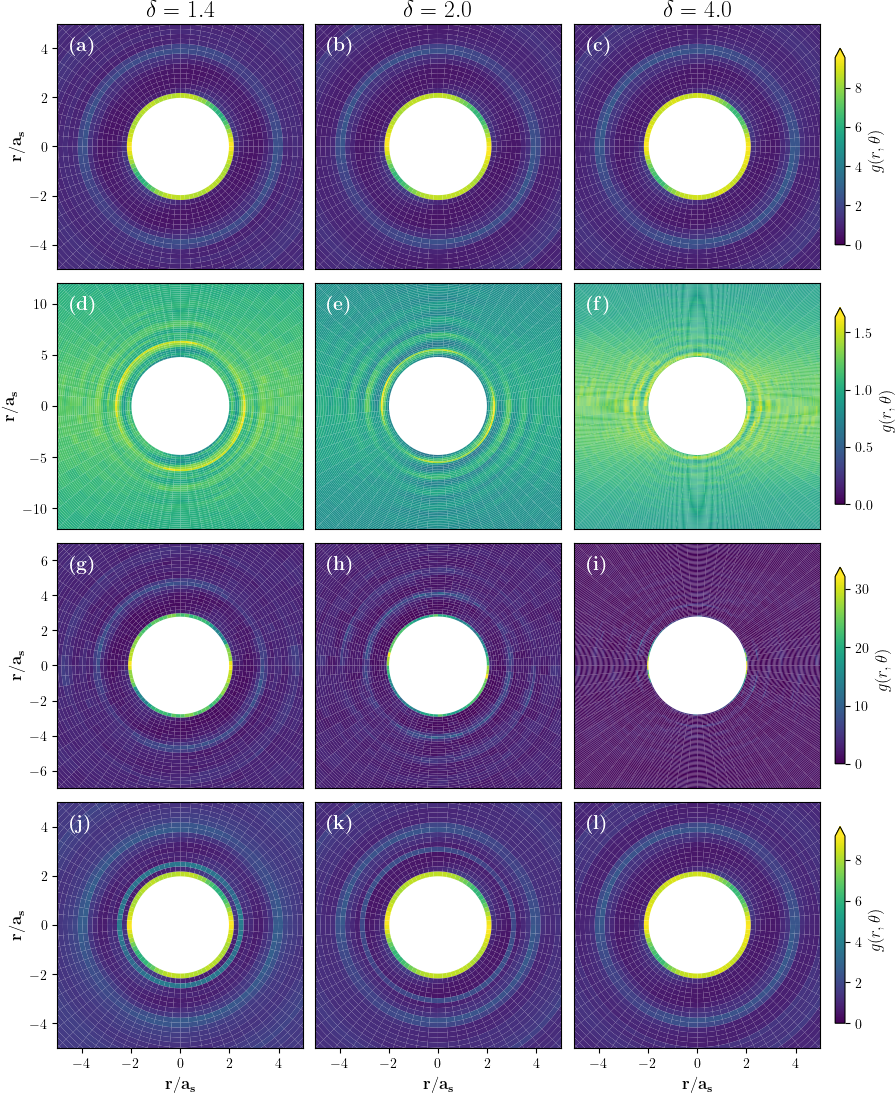

In [13]:
import matplotlib.gridspec as gridspec
from matplotlib.patches import Wedge    # type:ignore 

# Some simulation parameters.
npp    = 1000
numRun = 1
vr     = '0.75'

if vr == '0.25':
    phi = [0.76, 0.77, 0.795]
    ar  = [1.4, 2.0, 4.0] 
elif vr == '0.75':
    phi = [0.77, 0.77, 0.78]
    ar  = [1.4, 2.0, 4.0]

sizePairs  = ['ss', 'sl', 'll', 'all']
label_list = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', 
              '(g)', '(h)', '(i)', '(j)', '(k)', '(l)']

fig = plt.figure(figsize=(9, 11), constrained_layout =True)  # Enable constrained layout
gs  = gridspec.GridSpec(len(sizePairs), len(phi), figure=fig, hspace=0.05, wspace=0.02)  # Remove hspace & wspace (handled automatically)
ax  = [[fig.add_subplot(gs[i, j]) for j in range(len(phi))] for i in range(len(sizePairs))]

kk = -1
for i, sizePair in enumerate(sizePairs):
    for j, phij in enumerate(phi):
        phir = '{:.3f}'.format(phij) if len(str(phij).split('.')[1]) > 2 else '{:.2f}'.format(phij)
        arj  = ar[j]
        dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(dataname): 
            datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
            rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
            thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
            g_r_theta = np.genfromtxt(datFile, skip_header=5)
                
            if sizePair == 'll':
                ds   = arj
                #plim = 3
            elif sizePair == 'sl':
                ds   = 1 + arj
                #plim = 3
            else:
                ds   = 1
                #plim = 5 

            plim  = 5 # going upto certain particles far
            tdist = ds*plim
            rlim  = np.abs(rbin - tdist*np.sqrt(2)*1.1).argmin() # closest index from plim*ds
            r1    = np.abs(rbin - ds*2).argmin()

            g_r_submat = g_r_theta[r1:rlim, :]
            norm = plt.Normalize(vmin=np.min(g_r_submat), vmax=np.max(g_r_submat))
            cmap = plt.cm.viridis
            #cmap = plt.cm.cividis

            for ii in range(r1, rlim):
                for jj in range(len(thetabin) - 1):
                    theta_start = np.degrees(thetabin[jj])
                    theta_end   = np.degrees(thetabin[jj + 1])
                    r_start     = rbin[ii]
                    r_end       = rbin[ii + 1]
    
                    wedge = Wedge(
                        (0, 0), r_end, theta_start, theta_end,
                        width     = r_end - r_start,
                        facecolor = cmap(norm(g_r_theta[ii, jj])),
                        edgecolor = 'none',
                        transform = ax[i][j].transData._b,
                        antialiased = True,
                        rasterized  = True)
                
                    ax[i][j].add_patch(wedge)
                    
            ax[i][j].set_aspect('equal')
            ax[i][j].set_xlim([-tdist, tdist])
            ax[i][j].set_ylim([-tdist, tdist])
            ax[i][j].grid(False)
            ax[0][j].set_title(fr'${{\delta = {arj}}}$', fontsize=17, pad=5)
            ax[i][0].set_ylabel(r'$\mathbf{r / a_{s}}$', fontsize=12)
            ax[-1][j].set_xlabel(r'$\mathbf{r / a_{s}}$', fontsize=12)

            if j != 0:
                ax[i][j].set_yticklabels([])
                ax[i][j].set_yticks([])

            if sizePair != sizePairs[-1]:
                ax[i][j].set_xticklabels([])
                ax[i][j].set_xticks([])

            kk += 1
            ax[i][j].text(0.05, 0.95, r'\textbf{' + label_list[kk] + '}', 
                          transform=ax[i][j].transAxes, fontsize=14, 
                          verticalalignment='top', 
                          horizontalalignment='left', color='white')
                    
            del rbin, thetabin, g_r_theta
            
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(g_r_submat), vmax=np.max(g_r_submat)))
    print([np.min(g_r_submat), np.max(g_r_submat)])
    sm.set_array([]) 
    cbar = fig.colorbar(sm, ax=ax[i][j], fraction=0.05, pad=0.06, shrink=0.8, aspect=20, extend='max')
    cbar.set_label(r'$g(r,\theta)$', fontsize=12)

fig.savefig(f'{fig_save_path}/PDF_vr_{vr}.png', bbox_inches="tight", dpi=800, transparent=False,)
plt.show()

## Figure 3

In [22]:
# fit for viscosity

phim = [
    [0.7886717028827888, 0.7894387136954615, 0.793926329607985, 0.8324103075865033],
    [0.7886717028827888, 0.7877885526918533, 0.7939236898756902, 0.8239196866554372],
    [0.7886717028827888, 0.7885308930400247, 0.7900830006913417, 0.8044291017153138]
]

cvals = [
    [2.2961534930915994, 2.3650311285005365, 2.3581023842731605, 2.630286432009137],
    [2.2961534930915994, 2.2844228427617583, 2.2697625367992815, 2.355255703134564],
    [2.2961534930915994, 2.3000699722687648, 2.217088555299523, 2.2226341715514715]
]

# fit for particle pressure
phim1 =[[1.5715168229270542,
  1.5682151816482461,
  1.5553795002364215,
  1.9388390284729693],
 [1.5715168229270542,
  1.4836455409253317,
  1.5358291150105385,
  1.6539741565472672],
 [1.5715168229270542,
  1.564849769378203,
  1.4894275394110041,
  1.5109527282076463]]

cvals1 = [[8.624202080168285, 8.571864298284478, 8.36217328239919, 10.865249036885515],
 [8.624202080168285, 7.9125522663596, 8.198785417742185, 8.697407647559611],
 [8.624202080168285, 8.553277946417671, 7.898454068926786, 7.850309324906102]]

0.9453107254218677, -1.0069408352133284
1.1352879118020947, -1.1251578545488028
1.1221980136993668, -1.1267909310681548
1.0579701110826991, -1.1353948846815356


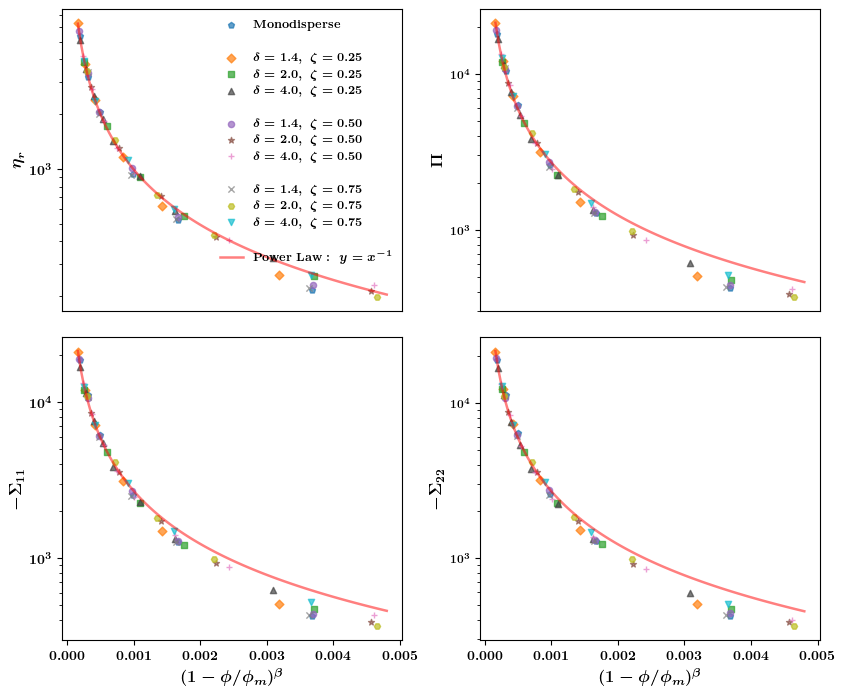

In [51]:
from scipy.optimize import curve_fit

def power_law(x, a, b):
    x = np.clip(x, 1e-10, None)
    exp_term = b * np.log(x)
    exp_term = np.clip(exp_term, -500, 500)  # Clip exponent to prevent overflow
    result = np.exp(exp_term)
    return a * result
    
def linear_func(x, m, b):
    return m * x + b 

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 4 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [r'$\eta_r$', r'$\Pi$', 
                r'$ - \Sigma_{11} $', r'$ - \Sigma_{22} $']

paramall     = [[] for _ in range(totParams)] # required for fitting
phimall      = [[] for _ in range(totParams)]
param        = [[] for _ in range(totParams)]
paramserr    = [[] for _ in range(totParams)]

fig, ax = plt.subplots(nrows, ncols, figsize=(8.5, 7))

## plotting ar = 1 and vr = 0.25 case first
for k, phi in enumerate(phiv):
    phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    param_list     = [[] for _ in range(totParams)]
    paramserr_list = [[] for _ in range(totParams)]
    for run in range(numRuns):
        phim_vals = [(1 - (i / phim[0][0])) ** (cvals[0][0]) if phim[0][0] != 0 
                     and (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            pp       = data[off:, 8]/data[off:, 2]
            
            datasets = [data[off:, 3], pp, 
                       -(data[off:, 10]+data[off:, 11]), 
                       -(data[off:, 11])]
            
            for ii, datset in enumerate(datasets):
                param_list[ii].append(np.mean(datset) if len(datset) > off else None)
                paramserr_list[ii].append(np.std(datset) if len(datset) > off else None)
                
    for jj in range(totParams):
        param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
        paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)

for kk in range(totParams):
    row, col = divmod(kk, 2)
    param_filtered      = [x for x in param[kk] if not np.isnan(x)]
    paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
    phim_vals_filtered  = [y for x, y in zip(param[kk], phim_vals) if not np.isnan(x)]
    paramall[kk].append(param_filtered)
    phimall[kk].append(phim_vals_filtered)
    
    ax[row, col].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                         s=20, color=colors[pcount], alpha=0.7,  
                         label=r'$\textbf{Monodisperse}$')
    
pcount += 1
ax[0,0].plot([], [], ' ', label=" ")
# plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = [[] for _ in range(totParams)]
        paramserr = [[] for _ in range(totParams)]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = [[] for _ in range(totParams)]
            paramserr_list = [[] for _ in range(totParams)]
            for run in range(numRuns):
                phim_vals = [(1 - (i/phim[l][j+1])) ** (cvals[l][j+1]) if phim[l][j+1] != 0 and 
                             (1 - (i / phim[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir+"F_rig.txt"):
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    pp       = data[off:, 8]/data[off:, 2]
                    
                    datasets = [data[off:, 3], pp, 
                                -(data[off:, 10]+data[off:, 11]), 
                                -(data[off:, 11])]
                    
                    for ii, datset in enumerate(datasets):
                        param_list[ii].append(np.mean(datset) if len(datset) > off else np.nan)
                        paramserr_list[ii].append(np.std(datset) if len(datset) > off else np.nan)
                                                  
                    
            for jj in range(totParams):
                param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
                paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)
        
        for kk in range(totParams):
            row, col = divmod(kk, 2)
            param_filtered      = [x for x in param[kk] if not np.isnan(x)]
            paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
            phim_vals_filtered  = [y for x, y in zip(param[kk], phim_vals) if not np.isnan(x)]
            paramall[kk].append(param_filtered)
            phimall[kk].append(phim_vals_filtered)
            
            ax[row, col].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                     s=20, color=colors[pcount], alpha=0.7,  
                     label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')

        pcount += 1
    ax[0,0].plot([], [], ' ', label=" ") 

tx, ty = 0.95, 0.95;

for ll in range(totParams):
    row, col  = divmod(ll, 2)
    paramFlat = [i for sublist in paramall[ll] for i in sublist]
    phimFlat  = [i for sublist in phimall[ll] for i in sublist]
    #xlin = np.linspace(np.min(phimFlat)*.95,np.max(phimFlat)*1.05, 100)
    xlin = np.linspace(1.6e-4, 0.0048, 100)
    params, covariance = curve_fit(power_law, phimFlat, paramFlat)
    a, b = params
    ax[row][col].plot(xlin, power_law(xlin, a, b), color='r', 
                      label = r"$\textbf{Power Law}: \; y = x^{-1}$", 
                      linewidth=1.8, alpha=0.5)
    
    equation_text = fr"$y = {a:.2f}x^{{{b:.2f}}}$"
    #ax[row][col].text(tx, ty, equation_text, transform=ax[row][col].transAxes, fontsize=6, color='r')
    print(f'{a}, {b}')

    ax[row][col].set_ylabel(ylables[ll], fontsize=12)
    ax[0][col].get_xaxis().set_visible(False)
    ax[1][col].set_xlabel(r'$(1 - \phi/\phi_m)^{\beta}$', fontsize=12)
    ax[1][col].tick_params(axis='x', labelsize=10)  # set x-tick label size
    ax[row][0].tick_params(axis='y', labelsize=10)

    ax[row][col].set_yscale('log')
 
    ax[0][0].legend(loc='upper right', fontsize=8.5, frameon=False, labelspacing=0.5)
#ax[2][0].set_yscale('log')
#ax[2][1].set_yscale('log')

fig.tight_layout()

if False:
    figFormat=".pdf"
    plt.savefig(fig_save_path+'powerlaw_all_phim'+figFormat, bbox_inches="tight",dpi=800)
plt.show()

1.0579706501411503, 1.0007740293107463
1.0579706501411503, 3.179547532103645
1.0579706501411503, 3.1854760466894563
1.0579706501411503, 3.2239283632171705


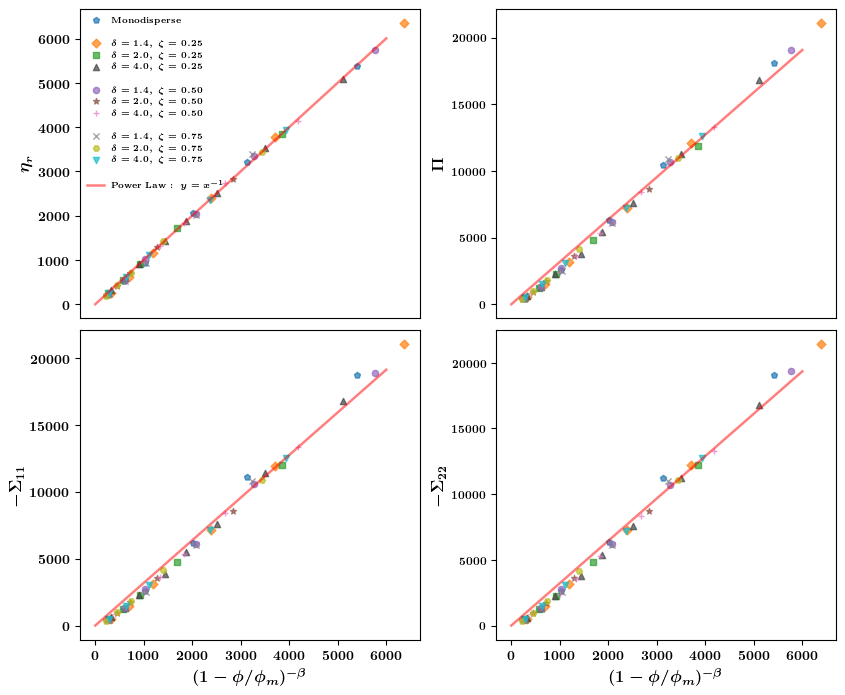

In [74]:
from scipy.optimize import curve_fit

def power_law(x, a, b):
    x = np.clip(x, 1e-10, None)
    exp_term = b * np.log(x)
    exp_term = np.clip(exp_term, -500, 500)  # Clip exponent to prevent overflow
    result = np.exp(exp_term)
    return a * result
    
def linear_func(x, m):
    return m * x

def linear_func2(x, m, b):
    return m * x + b 

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 4 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [r'$\eta_r$', r'$\Pi$', 
                r'$ - \Sigma_{11} $', r'$ - \Sigma_{22} $']

paramall     = [[] for _ in range(totParams)] # required for fitting
phimall      = [[] for _ in range(totParams)]
param        = [[] for _ in range(totParams)]
paramserr    = [[] for _ in range(totParams)]

fig, ax = plt.subplots(nrows, ncols, figsize=(8.5, 7))

## plotting ar = 1 and vr = 0.25 case first
for k, phi in enumerate(phiv):
    phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    param_list     = [[] for _ in range(totParams)]
    paramserr_list = [[] for _ in range(totParams)]
    for run in range(numRuns):
        phim_vals = [(1 - (i / phim[0][0])) ** -(cvals[0][0]) if phim[0][0] != 0 
                     and (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            pp       = data[off:, 8]/data[off:, 2]
            
            datasets = [data[off:, 3], pp, 
                       -(data[off:, 10]+data[off:, 11]), 
                       -(data[off:, 11])]
            
            for ii, datset in enumerate(datasets):
                param_list[ii].append(np.mean(datset) if len(datset) > off else None)
                paramserr_list[ii].append(np.std(datset) if len(datset) > off else None)
                
    for jj in range(totParams):
        param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
        paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)

for kk in range(totParams):
    row, col = divmod(kk, 2)
    param_filtered      = [x for x in param[kk] if not np.isnan(x)]
    paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
    phim_vals_filtered  = [y for x, y in zip(param[kk], phim_vals) if not np.isnan(x)]
    paramall[kk].append(param_filtered)
    phimall[kk].append(phim_vals_filtered)
    
    ax[row, col].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                         s=20, color=colors[pcount], alpha=0.7,  
                         label=r'$\textbf{Monodisperse}$')
    
pcount += 1
ax[0,0].plot([], [], ' ', label=" ")
# plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = [[] for _ in range(totParams)]
        paramserr = [[] for _ in range(totParams)]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = [[] for _ in range(totParams)]
            paramserr_list = [[] for _ in range(totParams)]
            for run in range(numRuns):
                phim_vals = [(1 - (i/phim[l][j+1])) ** -(cvals[l][j+1]) if phim[l][j+1] != 0 and 
                             (1 - (i / phim[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir+"F_rig.txt"):
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    pp       = data[off:, 8]/data[off:, 2]
                    
                    datasets = [data[off:, 3], pp, 
                                -(data[off:, 10]+data[off:, 11]), 
                                -(data[off:, 11])]
                    
                    for ii, datset in enumerate(datasets):
                        param_list[ii].append(np.mean(datset) if len(datset) > off else np.nan)
                        paramserr_list[ii].append(np.std(datset) if len(datset) > off else np.nan)
                                                  
                    
            for jj in range(totParams):
                param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
                paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)
        
        for kk in range(totParams):
            row, col = divmod(kk, 2)
            param_filtered      = [x for x in param[kk] if not np.isnan(x)]
            paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
            phim_vals_filtered  = [y for x, y in zip(param[kk], phim_vals) if not np.isnan(x)]
            paramall[kk].append(param_filtered)
            phimall[kk].append(phim_vals_filtered)

            #param_filtered = np.log(np.array(param_filtered))**2.5
            
            ax[row, col].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                     s=20, color=colors[pcount], alpha=0.7,  
                     label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')

        pcount += 1
    ax[0,0].plot([], [], ' ', label=" ") 

tx, ty = 0.95, 0.95;

for ll in range(totParams):
    row, col  = divmod(ll, 2)
    paramFlat = [i for sublist in paramall[ll] for i in sublist]
    phimFlat  = [i for sublist in phimall[ll] for i in sublist]
    #xlin = np.linspace(np.min(phimFlat)*.95,np.max(phimFlat)*1.05, 100)
    xlin = np.linspace(0, 6000, 100)
    params, covariance = curve_fit(linear_func, phimFlat, paramFlat)
    #a, b = params
    b = params[0]
    ax[row][col].plot(xlin, linear_func(xlin, b), color='r', 
                      label = r"$\textbf{Power Law}: \; y = x^{-1}$", 
                      linewidth=1.8, alpha=0.5)
    
    #equation_text = fr"$y = {a:.2f}x^{{{b:.2f}}}$"
    #ax[row][col].text(tx, ty, equation_text, transform=ax[row][col].transAxes, fontsize=6, color='r')
    print(f'{a}, {b}')

    ax[row][col].set_ylabel(ylables[ll], fontsize=12)
    ax[0][col].get_xaxis().set_visible(False)
    ax[1][col].set_xlabel(r'$(1 - \phi/\phi_m)^{-\beta}$', fontsize=12)
    ax[1][col].tick_params(axis='x', labelsize=10)  # set x-tick label size
    ax[row][0].tick_params(axis='y', labelsize=10)

    #ax[row][col].set_yscale('log')
 
    ax[0][0].legend(loc='upper left', fontsize=6, frameon=False, labelspacing=0.5)
#ax[2][0].set_yscale('log')
#ax[2][1].set_yscale('log')

fig.tight_layout()

if False:
    figFormat=".pdf"
    plt.savefig(fig_save_path+'powerlaw_all_phim'+figFormat, bbox_inches="tight",dpi=800)
plt.show()

0.0023924936366335227, -0.5880934893667229
-101.91782846152067, 2.91286192278178


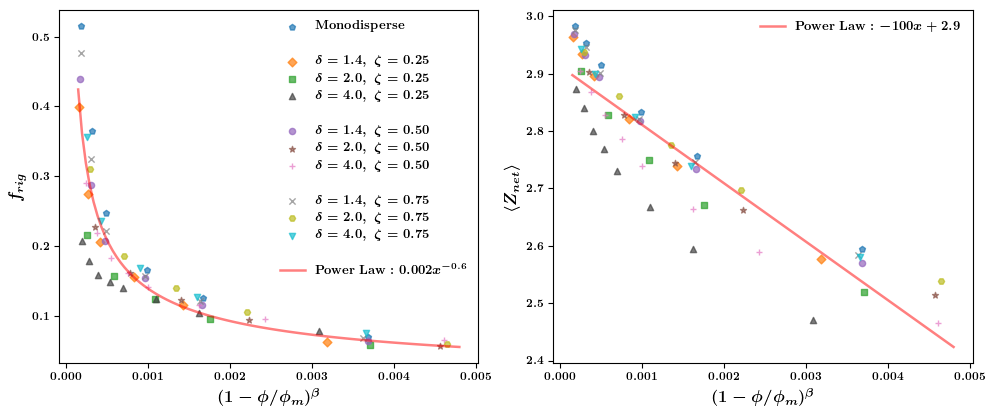

In [100]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Math
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
import matplotlib.patches as patches

def power_law(x, a, b):
    x = np.clip(x, 1e-10, None)
    exp_term = b * np.log(x)
    exp_term = np.clip(exp_term, -500, 500)  # Clip exponent to prevent overflow
    result = np.exp(exp_term)
    return a * result
    
def linear_func(x, m, b):
    return m * x + b 


# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 2 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables = [ r'$f_{rig}$', r'$\langle Z_{{net}} \rangle$']

paramall     = [[] for _ in range(totParams)] # required for fitting
phimall      = [[] for _ in range(totParams)]
param        = [[] for _ in range(totParams)]
paramserr    = [[] for _ in range(totParams)]

fig, ax = plt.subplots(1, 2, figsize=(10, 4.2))

## plotting ar = 1 and vr = 0.25 case first
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    param_list     = [[] for _ in range(totParams)]
    paramserr_list = [[] for _ in range(totParams)]
    for run in range(numRuns):
        phim_vals = [ (1 - (i / phim[0][0])) ** (cvals[0][0]) if phim[0][0] != 0 
                     and  (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)

            frigFile = glob.glob(workDir+"F_rig.txt")[0]
            frig     = np.loadtxt(frigFile)/ npp

            znetFile = glob.glob(workDir+"Z_Znet.txt")[0]
            znet     = np.loadtxt(znetFile)[:, 2]

            datasets = [frig[off:], znet[off:]]
            
            for ii, datset in enumerate(datasets):
                param_list[ii].append(np.mean(datset) if len(datset) > off else None)
                paramserr_list[ii].append(np.std(datset) if len(datset) > off else None)
                
    for jj in range(totParams):
        param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
        paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)

for kk in range(2):
    #row, col = divmod(kk, 2)
    param_filtered      = [x for x in param[kk] if not np.isnan(x)]
    paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
    phim_vals_filtered  = [y for x, y in zip(param[kk], phim_vals) if not np.isnan(x)]
    paramall[kk].append(param_filtered)
    phimall[kk].append(phim_vals_filtered)
    
    ax[kk].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                         s=20, color=colors[pcount], alpha=0.7,  
                         label=r'$\textbf{Monodisperse}$')
    
pcount += 1
ax[0].plot([], [], ' ', label=" ") 
# plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = [[] for _ in range(totParams)]
        paramserr = [[] for _ in range(totParams)]
        for k, phi in enumerate(phiv):
            phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = [[] for _ in range(totParams)]
            paramserr_list = [[] for _ in range(totParams)]
            for run in range(numRuns):
                phim_vals = [(1 - (i/phim[l][j+1])) ** (cvals[l][j+1]) if phim[l][j+1] != 0 and 
                             (1 - (i/phim[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir+"F_rig.txt"):
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
        
                    frigFile = workDir+"F_rig.txt"
                    frig     = np.loadtxt(frigFile)/ npp
        
                    znetFile = workDir+"Z_Znet.txt"
                    znet     = np.loadtxt(znetFile)[:, 2]
        
                    datasets = [frig[off:], znet[off:]]
                    
                    for ii, datset in enumerate(datasets):
                        param_list[ii].append(np.mean(datset) if len(datset) > off else None)
                        paramserr_list[ii].append(np.std(datset) if len(datset) > off else None)
                                                  
            for jj in range(totParams):
                param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
                paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)
        
        for kk in range(totParams):
            #row, col = divmod(kk, 2)
            param_filtered      = [x for x in param[kk] if not np.isnan(x)]
            paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
            phim_vals_filtered  = [y for x, y in zip(param[kk], phim_vals) if not np.isnan(x)]
            paramall[kk].append(param_filtered)
            phimall[kk].append(phim_vals_filtered)
            
            ax[kk].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                                 s=20, color=colors[pcount], alpha=0.7,  
                                 label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')

        pcount += 1
    ax[0].plot([], [], ' ', label=" ") 
        
tx, ty = 0.7, 0.7;
for ll in range(totParams):
    #row, col  = divmod(ll, 2)
    paramFlat = [i for sublist in paramall[ll] for i in sublist]
    phimFlat  = [i for sublist in phimall[ll]  for i in sublist]
    #xlin = np.linspace(np.min(phimFlat)*.95,np.max(phimFlat)*1.05, 100)
    xlin = np.linspace(1.5e-4, .0048, 100)
    if ll == 0:
        params, covariance = curve_fit(power_law, phimFlat, paramFlat)
        a, b = params
        ax[ll].plot(xlin, power_law(xlin, *params), color='r', 
                    label=fr"$\textbf{{Power Law}}: 0.002 x^{{-0.6}}$", 
                    linewidth=1.8, alpha=0.5)
        equation_text = fr"$y = {a:.2f}x^{{{b:.2f}}}$"
        #ax[ll].text(tx, ty, equation_text, transform=ax[ll].transAxes, fontsize=12, color='r')
        print(f'{a}, {b}')
    else:
        params, covariance = curve_fit(linear_func, phimFlat, paramFlat)
        m, b = params
        line, = ax[ll].plot(xlin, linear_func(xlin, *params), color='r', 
                    label=r"$\textbf{Power Law}: -100x + 2.9$", linewidth=1.8, alpha=0.5)

        ax[ll].legend(handles=[line], loc='upper right', fontsize=9, frameon=False, labelspacing=0.5)

        equation_text = fr"$y = {m:.2f}x + {{{b:.2f}}}$"
        #ax[ll].text(tx, ty, equation_text, transform=ax[ll].transAxes, fontsize=6, color='r')
        print(f'{m}, {b}')
    ax[ll].set_ylabel(ylables[ll], fontsize=12)  # You can also specify font size if needed
    ax[ll].set_xlabel(r'$(1 - \phi/\phi_m)^{\beta}$', fontsize=12)
    

ax[0].legend(loc='upper right', fontsize=9, frameon=False, labelspacing=0.5)
#ax[1].legend([r"$\textbf{Power Law}: -100x + 2.9$"], loc='upper right', 
             #fontsize=9, frameon=False, labelspacing=0.5)

#ax[2][0].set_yscale('log')
#ax[2][1].set_yscale('log')

fig.tight_layout()

if True:
    figFormat=".pdf"
    plt.savefig(fig_save_path+'powerlaw_all_phim22'+figFormat, bbox_inches="tight",dpi=800)
plt.show()

## Figure 4

In [2]:
phim = np.array([[0.78453329, 0.78486939, 0.7909178 , 0.82419867],
                   [0.78453329, 0.78484748, 0.7927913 , 0.8228579 ],
                   [0.78453329, 0.78464183, 0.78896423, 0.80393124]])

In [11]:
#new from linear fit (alp_opt = 2.42)
phim = np.array([[0.787, 0.788, 0.794, 0.828],
                   [0.787, 0.787, 0.798, 0.826],
                   [0.787, 0.787, 0.792, 0.807]])

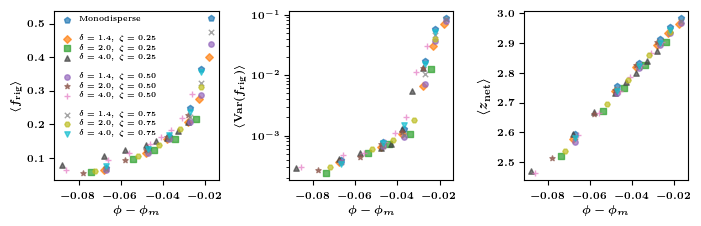

In [34]:
# import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Math
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
import matplotlib.patches as patches

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 2 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [ r'$f_{rig}$', r'$\langle Z_{{net}} \rangle$']

phimall      = []
param        = []
paramserr    = []
zm = []
fig_height = 2.3
#fig, ax= plt.subplots(1, 3, figsize=(11,3.5))
fig, ax= plt.subplots(1, 3, figsize=(fig_width, fig_height))

## plotting ar = 1 and vr = 0.25 case first
for k, phi in enumerate(phiv):
    phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    param_list     = []
    paramserr_list = []
    zlist =[]
    for run in range(numRuns):
        phim_vals = [(i -  phim[0][0]) for i in phiv]
        workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        
        if os.path.exists(workDir):
            frigFile = workDir + "F_rig.txt"
            frig     = np.loadtxt(frigFile)/ npp

            znetFile = workDir+"Z_Znet.txt"
            znet     = np.loadtxt(znetFile)[:, 2]
            
            param_list.append(np.mean(frig[off:]) if len(frig) > off else None)
            paramserr_list.append(np.var(frig[off:]) if len(frig) > off else None)
            zlist.append(np.mean(znet[off:]))
            
    param.append(np.mean(param_list) if param_list else np.nan)
    paramserr.append(np.mean(paramserr_list) if paramserr_list else np.nan)
    zm.append(np.nanmean(zlist) if zlist else np.nan)
    
param_filtered     = [x for x in param if not np.isnan(x)]
paramerr_filtered  = [x for x in paramserr if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(param, phim_vals) if not np.isnan(x)]
z_filtered         = [x for x in zm if not np.isnan(x)]

ax[0].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
            s=20, color=colors[pcount], alpha=0.7,  
            label=r'$\textbf{Monodisperse}$')
ax[1].scatter(phim_vals_filtered, paramerr_filtered, marker=marker_shape[pcount], 
            s=20, color=colors[pcount], alpha=0.7, label=r'$\textbf{Monodisperse}$')
            
ax[2].scatter(phim_vals_filtered, z_filtered, marker=marker_shape[pcount], 
              s=20, color=colors[pcount], alpha=0.7, label=r'$\textbf{Monodisperse}$')  
              
    
pcount += 1
ax[0].plot([], [], ' ', label=" ") 
ax[1].plot([], [], ' ', label=" ")

# plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = []
        paramserr = []
        zm        = []
        for k, phi in enumerate(phiv):
            phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = []
            paramserr_list = []
            zlist = []
            for run in range(numRuns):
                phim_vals     = [(i - phim[l][j+1]) for i in phiv]
                workDir       = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                frigFile = workDir+"F_rig.txt"
                znetfile = workDir+"Z_Znet.txt"
                if os.path.exists(frigFile) and os.path.exists(znetfile):
                    frigFile = workDir+"F_rig.txt"
                    frig     = np.loadtxt(frigFile)/ npp

                    znetFile = workDir+"Z_Znet.txt"
                    znet     = np.loadtxt(znetFile)[:, 2]
                    
                    if len(frig) > off:
                        param_list.append(np.mean(frig[off:]))
                        paramserr_list.append(np.var(frig[off:]))
                        zlist.append(np.mean(znet[off:]))
                    else:
                        param_list.append(np.nan)
                        paramserr_list.append(np.nan)
                        zlist.append(np.nan)
                        
            # Average over runs for this phi
            param.append(np.nanmean(param_list) if param_list else np.nan)
            paramserr.append(np.nanmean(paramserr_list) if paramserr_list else np.nan)
            zm.append(np.nanmean(zlist) if zlist else np.nan)
            
        # Clean up for plotting
        param_filtered     = [x for x in param if not np.isnan(x)]
        paramerr_filtered  = [x for x in paramserr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(param, phim_vals) if not np.isnan(x)]
        z_filtered         = [x for x in zm if not np.isnan(x)]
        
        ss = 15 # marker size
        ax[0].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                    s=ss, color=colors[pcount], alpha=0.7,  
                    label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')
        ax[1].scatter(phim_vals_filtered, paramerr_filtered, marker=marker_shape[pcount], 
                    s=ss, color=colors[pcount], alpha=0.7,  
                    label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')
        ax[2].scatter(phim_vals_filtered, z_filtered, marker=marker_shape[pcount], 
                      s=ss, color=colors[pcount], alpha=0.7,  
                      label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')    
        
        pcount += 1

    ax[0].plot([], [], ' ', label=" ") 
    ax[1].plot([], [], ' ', label=" ") 

labelfont = 8
tickfont  = 7.5  

for ax_i in ax:
    ax_i.tick_params(axis='both', labelsize=tickfont)

    ax_i.set_xlabel(r'$\phi - \phi_m$', fontsize=labelfont, labelpad=5)
    
ax[0].set_ylabel(r'$\langle f_{\mathrm{rig}} \rangle$', fontsize=labelfont)
ax[1].set_ylabel(r'$\langle \mathrm{Var}(f_{\mathrm{rig}}) \rangle$', fontsize=labelfont)
ax[1].set_yscale('log')

ax[2].set_ylabel(r'$\langle z_{\mathrm{net}} \rangle$', fontsize=labelfont+2)
ax[0].legend(loc='upper left', fontsize=4.9, frameon=False, labelspacing=0.5)

fig.tight_layout()

if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/frig_znet_plot{figFormat}', bbox_inches="tight",pad_inches=0, dpi=800)

plt.show()

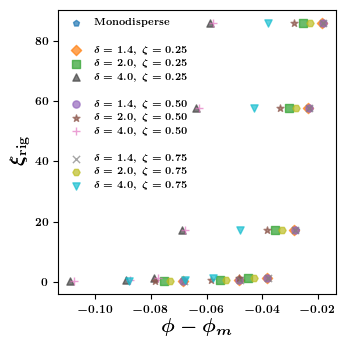

In [20]:
# import os Xi rig (like aritra paper)

import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Math
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
import matplotlib.patches as patches

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 2 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [ r'$f_{rig}$', r'$\langle Z_{{net}} \rangle$']

phimall   = []
xi_rig_all     = []
paramserr = []
zm        = []
fig, ax   = plt.subplots(1, 1, figsize=(3.5,3.5))

## plotting ar = 1 and vr = 0.25 case first
for k, phi in enumerate(phiv):
    phir  = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    xi_rig_list = []
   
    for run in range(numRuns):
        phim_vals = [(i -  phim[0][0]) for i in phiv]
        workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        
        if os.path.exists(workDir):
            frigFile = workDir + "F_rig.txt"
            frig     = np.loadtxt(frigFile)/ npp

            znetFile = workDir+"Z_Znet.txt"
            znet     = np.loadtxt(znetFile)[:, 2]
            
            if len(frig) > off:
                frig_mean = np.mean(frig[off:])
                xi_rig    = npp * np.mean((frig[off:] - frig_mean)**2)
                xi_rig_list.append(xi_rig)
            
    xi_rig_all.append(np.mean(xi_rig_list) if xi_rig_list else np.nan)
    
param_filtered     = [x for x in xi_rig_all if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(xi_rig_all, phim_vals) if not np.isnan(x)]

ax.scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
            s=20, color=colors[pcount], alpha=0.7, label=r'$\textbf{Monodisperse}$')
        
pcount += 1
ax.plot([], [], ' ', label=" ") 

# phimall        = []
# xi_rig_all     = []

# plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        xi_rig_list1 = []
        for k, phi in enumerate(phiv):
            phir        = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            xi_rig_list2 = []
           
            for run in range(numRuns):
                phim_vals = [(i -  phim[l][j+1]) for i in phiv]
                workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
                
                if os.path.exists(workDir):
                    frigFile = workDir + "F_rig.txt"
                    frig     = np.loadtxt(frigFile)/ npp
        
                    znetFile = workDir+"Z_Znet.txt"
                    znet     = np.loadtxt(znetFile)[:, 2]
                    
                    if len(frig) > off:
                        frig_mean = np.mean(frig[off:])
                        xi_rig    = npp * np.mean((frig[off:] - frig_mean)**2)
                        xi_rig_list2.append(xi_rig)
                    
            xi_rig_list1.append(np.mean(xi_rig_list2) if xi_rig_list2 else np.nan)
                    
        # Clean up for plotting
        param_filtered     = [x for x in xi_rig_list1 if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(xi_rig_list1, phim_vals) if not np.isnan(x)]
        
        ax.scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                    s=27, color=colors[pcount], alpha=0.7,  
                    label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')
        
        pcount += 1

    ax.plot([], [], ' ', label=" ") 
    #ax[1].plot([], [], ' ', label=" ") 

labelfont = 14
tickfont  = 11  # You can adjust this as needed

# for ax_i in ax:
#     ax_i.tick_params(axis='both', labelsize=tickfont)

ax.set_xlabel(r'$\phi - \phi_m$', fontsize=labelfont)
ax.set_ylabel(r'$ \xi_{\mathrm{rig}} $', fontsize=labelfont)
ax.legend(loc='upper left', fontsize=7, frameon=False, labelspacing=0.5)

if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/Xi_rig_plot{figFormat}', bbox_inches="tight",dpi=800)

plt.show()

In [7]:
param_filtered

[-3.620927276526023e-15,
 -1.2614843414993887e-14,
 4.672164227775514e-16,
 -4.672164227775512e-16,
 -2.920102642359696e-14,
 -5.933648569274903e-14]

In [8]:
phim_vals_filtered

[-0.06810232999999999,
 -0.04810232999999997,
 -0.03810232999999996,
 -0.028102329999999953,
 -0.02310232999999995,
 -0.018102329999999944]

In [14]:
workDir

'/media/rahul/rahul_2TB/high_bidispersity/new_dataNP_1000/phi_0.80/ar_4.0/Vr_0.75/run_2/'

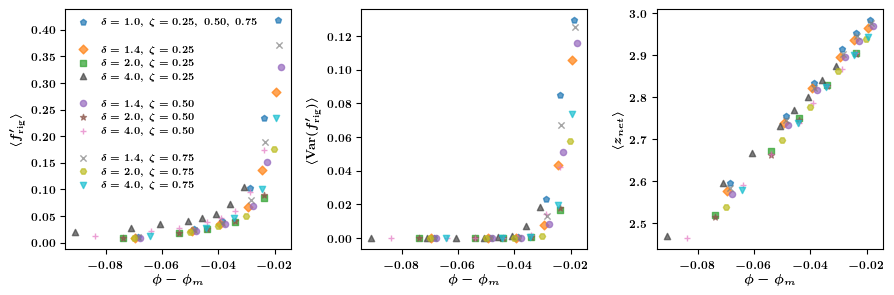

In [16]:
# import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Math
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
import matplotlib.patches as patches

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 2 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [ r'$f_{rig}$', r'$\langle Z_{{net}} \rangle$']

phimall      = []
param        = []
paramserr    = []
zm = []

fig, ax= plt.subplots(1, 3, figsize=(9, 3))

## plotting ar = 1 and vr = 0.25 case first
for k, phi in enumerate(phiv):
    phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    param_list     = []
    paramserr_list = []
    zlist = []
    for run in range(numRuns):
        phim_vals = [(i -  phim[0][0]) for i in phiv]
        workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        
        if os.path.exists(workDir):
            frigPrimeFile = glob.glob(workDir+"F_prime_rig.txt")[0]
            frig          = np.loadtxt(frigPrimeFile, skiprows=1)/ npp
            fprime        = list(frig[:,1])

            znetFile = workDir+"Z_Znet.txt"
            znet     = np.loadtxt(znetFile)[:, 2]
            
            param_list.append(np.mean(fprime[off:]) if len(fprime) > off else None)
            paramserr_list.append(np.var(fprime[off:]) if len(fprime) > off else None)
            zlist.append(np.mean(znet[off:]))
            
    param.append(np.mean(param_list) if param_list else np.nan)
    paramserr.append(np.mean(paramserr_list) if paramserr_list else np.nan)
    zm.append(np.nanmean(zlist) if zlist else np.nan)
    
param_filtered      = [x for x in param if not np.isnan(x)]
paramerr_filtered   = [x for x in paramserr if not np.isnan(x)]
phim_vals_filtered  = [y for x, y in zip(param, phim_vals) if not np.isnan(x)]
z_filtered          = [x for x in zm if not np.isnan(x)]

ax[0].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
            s=20, color=colors[pcount], alpha=0.7,  
            label=fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$')
ax[1].scatter(phim_vals_filtered, paramerr_filtered, marker=marker_shape[pcount], 
            s=20, color=colors[pcount], alpha=0.7)
ax[2].scatter(phim_vals_filtered, z_filtered, marker=marker_shape[pcount], 
              s=20, color=colors[pcount], alpha=0.7) 

pcount += 1
ax[0].plot([], [], ' ', label=" ") 
# plotting other cases
# plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = []
        paramserr = []
        zm = []
        for k, phi in enumerate(phiv):
            phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = []
            paramserr_list = []
            zlist = []
            for run in range(numRuns):
                phim_vals     = [(i - phim[l][j+1]) for i in phiv]
                workDir       = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                frigPrimeFile = workDir + "F_prime_rig.txt"
                if os.path.exists(frigPrimeFile):
                    frig   = np.loadtxt(frigPrimeFile, skiprows=1)/ npp
                    fprime = list(frig[:,1])

                    znetFile = workDir+"Z_Znet.txt"
                    znet     = np.loadtxt(znetFile)[:, 2]
            
                    if len(fprime) > off:
                        param_list.append(np.mean(fprime[off:]))
                        paramserr_list.append(np.var(fprime[off:]))
                        zlist.append(np.mean(znet[off:]))
                    else:
                        param_list.append(np.nan)
                        paramserr_list.append(np.nan)
                        zlist.append(np.nan)
                        
            # Average over runs for this phi
            param.append(np.nanmean(param_list) if param_list else np.nan)
            paramserr.append(np.nanmean(paramserr_list) if paramserr_list else np.nan)
            zm.append(np.nanmean(zlist) if zlist else np.nan)
            
        # Clean up for plotting
        param_filtered     = [x for x in param if not np.isnan(x)]
        paramerr_filtered  = [x for x in paramserr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(param, phim_vals) if not np.isnan(x)]
        z_filtered         = [x for x in zm if not np.isnan(x)]
        
        ax[0].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                      s=20, color=colors[pcount], alpha=0.7,  
                      label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')
        ax[1].scatter(phim_vals_filtered, paramerr_filtered, marker=marker_shape[pcount], 
                      s=20, color=colors[pcount], alpha=0.7,  
                      label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')
        ax[2].scatter(phim_vals_filtered, z_filtered, marker=marker_shape[pcount], 
                      s=20, color=colors[pcount], alpha=0.7,  
                      label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$') 
        
        pcount += 1
    ax[0].plot([], [], ' ', label=" ") 


ax[0].set_xlabel(r'$\phi - \phi_m$', fontsize=9)
ax[0].set_ylabel(r'$\langle f_{\mathrm{rig}}^{\prime} \rangle$', fontsize=9)

ax[1].set_xlabel(r'$\phi - \phi_m$', fontsize=9)
ax[1].set_yscale('log') 
ax[1].set_ylabel(r'$\langle \mathrm{Var}(f_{\mathrm{rig}}^{\prime}) \rangle$', fontsize=9)  # or std if you prefer
ax[0].legend(loc='upper left', fontsize=7, frameon=False, labelspacing=0.5)

ax[2].set_xlabel(r'$\phi - \phi_m$', fontsize=9)
ax[2].set_ylabel(r'$\langle z_{net} \rangle$', fontsize=9)

fig.tight_layout()

if False:
    figFormat=".pdf"
    plt.savefig(fig_save_path+'all_params_scaling'+figFormat, bbox_inches="tight",dpi=800)
    
plt.show()

## Fig 6

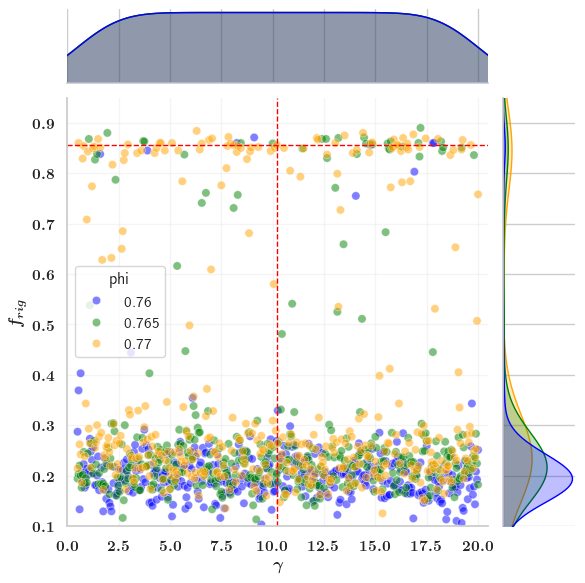

In [29]:
import os
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

npp = 1000
phi = [0.76, 0.765, 0.77]
vr  = '0.25'
ar  = '1.4'
numRun  = 1
off     = 50
sampRate = 5 # takes every 5th element

# Paths
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/"

# Initialize lists to store data
cumStrain_all = []
frig_all      = []
phi_labels    = []

# Loop through phi values
for phii in phi:
    workDir = f"{topDir}NP_{npp}/phi_{phii}/ar_{ar}/Vr_{vr}/run_{numRun}/"
    
    if os.path.exists(workDir + "F_rig.txt"):
        dataFile = workDir + "F_rig.txt"
        frig2    = np.loadtxt(dataFile) / npp
        frig1    = frig2[off:]
        frig     = frig2[off::sampRate]
        
        dataFile1    = glob.glob(workDir + "data_*.dat")[0]
        data1        = np.loadtxt(dataFile1)
        cumStrain1   = data1[off:, 1]
        cumStrain    = data1[off::sampRate, 1]
        srate        = data1[off:, 2]
        jammed_srate = [index for index, value in enumerate(srate) if value < 0]
        
        # Append data for plotting
        cumStrain_all.extend(cumStrain)
        frig_all.extend(frig)
        phi_labels.extend([phii] * len(cumStrain))

# Convert to DataFrame for Seaborn
df = pd.DataFrame({
    'cumStrain': cumStrain_all,
    'frig': frig_all,
    'phi': phi_labels
})

# Create jointplot
sns.set(style="whitegrid")
jp = sns.jointplot(
    data=df, x="cumStrain", y="frig", hue="phi", kind="scatter",
    palette=["blue", "green", "orange"], alpha=0.5,
    marginal_kws={'common_norm': False}  # Ensures all histograms are normalized consistently
)
jp.ax_joint.grid(which='both', alpha=0.2)

# Set axis limits
jp.ax_joint.set_xlim([0, 20.5])
jp.ax_joint.set_ylim([0.1, .95])
jp.ax_joint.set_xlabel(r'$\gamma$', fontsize=12)
jp.ax_joint.set_ylabel(r'$f_{rig}$', fontsize=12)

for idx in jammed_srate:
    # Plot vertical line at cumStrain[jammed_srate]
    jp.ax_joint.axvline(x=cumStrain1[idx], color='red', linestyle='--', linewidth=1)
    
    # Plot horizontal line at frig[jammed_srate]
    jp.ax_joint.axhline(y=frig1[idx], color='red', linestyle='--', linewidth=1)
    
# Save figure if needed
#figFormat = ".svg"
#plt.savefig(fig_save_path + "rig_criticality_" + vr + "_" + ar + figFormat, bbox_inches="tight", dpi=500)
plt.show()

In [30]:
jammed_srate[0]+off

1020

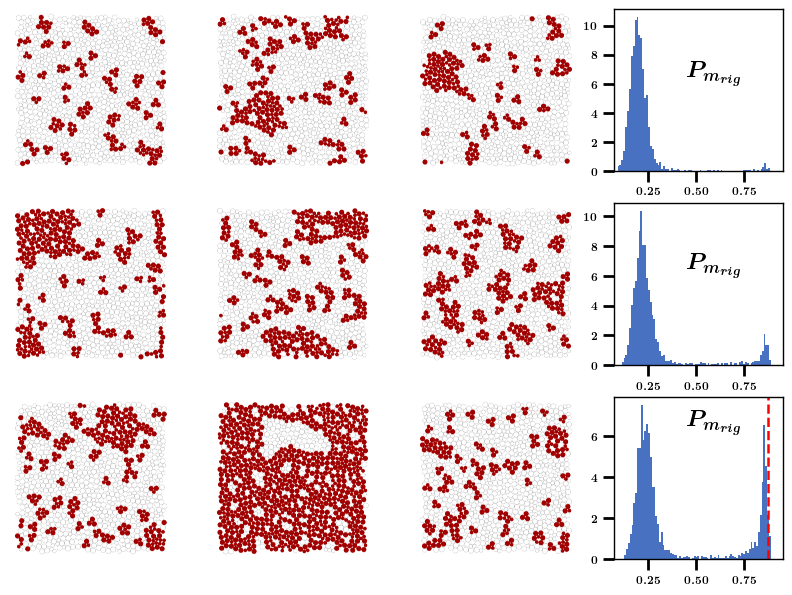

In [38]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib import gridspec

npp = 1000
phi = [0.76, 0.765, 0.77]
vr  = '0.25'
ar  = '1.4'
numRun  = 1
off     = 50
sampRate = 5 # takes every 5th element
numSnaps = 3
cropFrac = 0.1 # 10% crop

# Paths
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/'
topSnap       = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/rig_fig/'        
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/"

fig, ax = plt.subplots(len(phi), numSnaps + 1, figsize=(8, 6))

# Loop through phi values
for i, phii in enumerate(phi):
    workDir  = f"{topDir}NP_{npp}/phi_{phii}/ar_{ar}/Vr_{vr}/run_{numRun}/"
    
    files     = f"{topSnap}phi_{phii}_ar_{ar}_vr_{vr}_*.png"
    snapFiles = sorted(glob.glob(files))

    for j in range(numSnaps):
        img = Image.open(snapFiles[-(len(snapFiles) - numSnaps + j)])
        #width, height = img.size
        #img_cropped   = img.crop(img.width * cropFrac, img.height * cropFrac, img.width * (1-cropFrac), img.height * (1-cropFrac))
        ax[i][j].imshow(img)
        ax[i][j].set_xticks([]) 
        ax[i][j].set_yticks([])
        ax[i][j].set_frame_on(False)

    dataFile1 = glob.glob(workDir+"data_*.dat")[0]
    data1     = np.loadtxt(dataFile1)
    srate     = data1[off:, 2]
    jammed_srate = [index for index, value in enumerate(srate) if value < 0]

    dataFile = workDir + "F_rig.txt"
    frig2    = np.loadtxt(dataFile) / npp
    frig     = frig2[off:]

    counts, bin_edges = np.histogram(frig, bins=80, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    ax[i][-1].bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], color=(0.1, 0.3, 0.7, 0.8))
    pos = ax[i][-1].get_position().bounds  # pos is now a tuple (left, bottom, width, height)
    ax[i][-1].set_position([pos[0], pos[1] , pos[2]*0.9, pos[3] * 0.5])
    
    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i][-1].spines[spine].set_linewidth(1)
    ax[i][-1].set_xlim([0.07, 0.95])  # Corrected from ax[i][-1].xlim()
    ax[i][-1].tick_params(axis='both', which='major', width=2.0, size=8, labelsize=8)
    
    for index, value in enumerate(jammed_srate):
        bar_x = frig[value]  # x position of the bar
        ax[i][-1].axvline(x=bar_x * 1.02, color='red', linestyle='--', linewidth=1.8)

    ax[i][-1].text(0.45, 6.5, r'$P_{m_{rig}}$', fontsize=17)
    
    tick_values = [.25, .50, .75]  # Replace with the desired x-values for ticks
    ax[i][-1].set_xticks(tick_values)  # Corrected from ax[i][-1].xticks()

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace = 0.2)
plt.show()

mrig = 0.886
mrig = 0.765


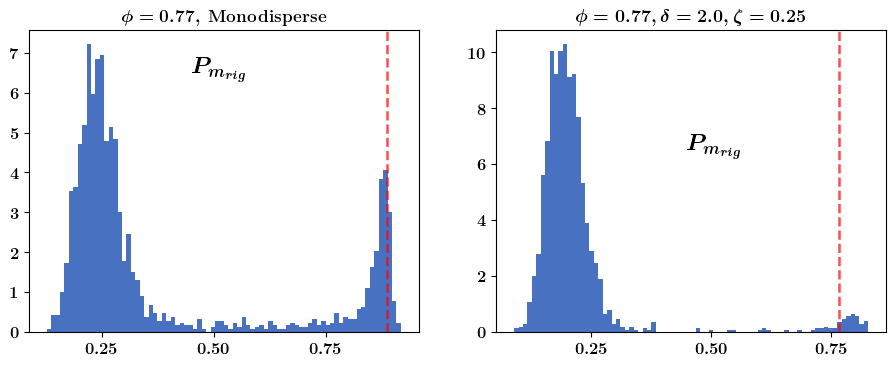

In [14]:
## For suplementary material
## Pmrig for other jamming cases

npp = 1000

#below arrays must be of same lengths
phi     = [0.765, 0.77]
vr      = ['0.25', '0.25']
ar      = [1.0, 2.0]
numRun  = [1, 2]
off     = 50

fig, ax = plt.subplots(1, 2, figsize=(9, 3.5))

# Loop through phi values
for i, phii in enumerate(phi):
    phir     = f"{phii:.3f}" if phii != round(phii, 2) else f"{phii:.2f}"
    workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{ar[i]}/Vr_{vr[i]}/run_{numRun[i]}/"

    dataFile1 = glob.glob(workDir+"data_*.dat")[0]
    data1     = np.loadtxt(dataFile1)
    srate     = data1[off:, 2]
    jammed_srate = [index for index, value in enumerate(srate) if value < 0]

    dataFile = workDir + "F_rig.txt"
    frig2    = np.loadtxt(dataFile) / npp
    frig     = frig2[off:]

    counts, bin_edges = np.histogram(frig, bins=80, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    ax[i].bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], color=(0.1, 0.3, 0.7, 0.8))
    pos = ax[i].get_position().bounds  # pos is now a tuple (left, bottom, width, height)
    ax[i].set_position([pos[0], pos[1] , pos[2]*0.9, pos[3] * 0.5])
    
    for index, value in enumerate(jammed_srate):
        bar_x = frig[value]  # x position of the bar
        ax[i].axvline(x=bar_x * 1.00, color='red', linestyle='--', linewidth=1.8, alpha =0.7)
        print(f'mrig = {bar_x}')
        
    ax[i].text(0.45, 6.5, r'$P_{m_{rig}}$', fontsize=17)
    
    tick_values = [.25, .50, .75]  # Replace with the desired x-values for ticks
    ax[i].set_xticks(tick_values)  # Corrected from ax[i][-1].xticks()
    ax[0].set_title(fr'$\phi = {phir}, \; \mathrm{{Monodisperse}}$', fontsize=12.5)
    ax[1].set_title(fr'$\phi = {phir}, \delta={ar[i]}, \zeta={vr[i]}$', fontsize=13)
    
    for axi in ax:  # ax is a list/array of subplots
        axi.set_xticks(tick_values)
        axi.tick_params(axis='both', labelsize=12)  # 12 is the font size
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace = 0.2)
if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/pmrig_other{figFormat}', bbox_inches="tight",dpi=800)

plt.show()

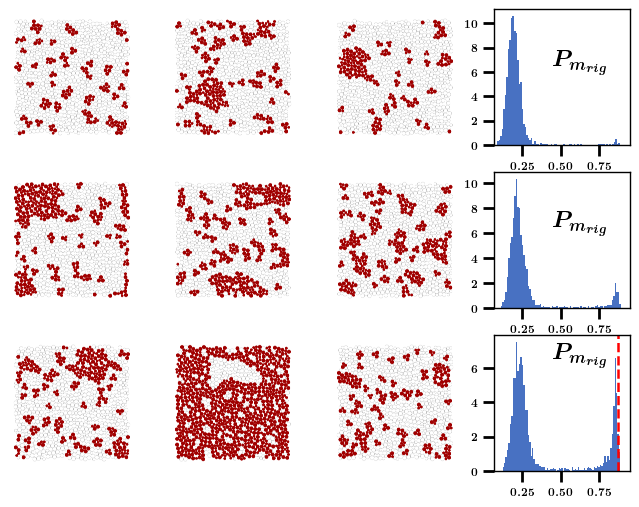

In [34]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib import gridspec

npp = 1000
phi = [0.76, 0.765, 0.77]
vr  = '0.25'
ar  = '1.4'
numRun  = 1
off     = 50
sampRate = 5 # takes every 5th element
numSnaps = 3
cropFrac = 0.1 # 10% crop

# Paths
topDir        = '/media/rahul/rahul_2TB/high_bidispersity/new_data/'
topSnap       = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/rig_fig/'        
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/"

# Adjust the width ratios for each column (make the last column smaller)
column_widths = [1, 1, 1, 1.1]  # Last column gets 0.5 of the width

# Adjust the height ratios for each row (make the last row smaller)
row_heights = [1, 1, 1]  # Default height for all rows
#row_heights[-1] = 0.6  # Reduce height for the last row to 0.6

fig = plt.figure(figsize=(8, 6))

# Create a GridSpec with both width and height ratios
gs = gridspec.GridSpec(len(phi), numSnaps + 1, width_ratios=column_widths, height_ratios=row_heights, wspace=0.3)

# Create axes
ax = [[fig.add_subplot(gs[i, j]) for j in range(numSnaps + 1)] for i in range(len(phi))]

# Loop through phi values
for i, phii in enumerate(phi):
    workDir  = f"{topDir}NP_{npp}/phi_{phii}/ar_{ar}/Vr_{vr}/run_{numRun}/"
    
    files     = f"{topSnap}phi_{phii}_ar_{ar}_vr_{vr}_*.png"
    snapFiles = sorted(glob.glob(files))

    for j in range(numSnaps):
        img = Image.open(snapFiles[-(len(snapFiles) - numSnaps + j)])
        #width, height = img.size
        #img_cropped = img.crop((img.width * cropFrac, img.height * cropFrac, img.width * (1 - cropFrac), img.height * (1 - cropFrac)))
        ax[i][j].imshow(img)
        ax[i][j].set_xticks([]) 
        ax[i][j].set_yticks([])
        ax[i][j].set_frame_on(False)

    dataFile1 = glob.glob(workDir+"data_*.dat")[0]
    data1     = np.loadtxt(dataFile1)
    srate     = data1[off:, 2]
    jammed_srate = [index for index, value in enumerate(srate) if value < 0]

    dataFile = workDir + "F_rig.txt"
    frig2    = np.loadtxt(dataFile) / npp
    frig     = frig2[off:]

    counts, bin_edges = np.histogram(frig, bins=80, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    ax[i][-1].bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], color=(0.1, 0.3, 0.7, 0.8))
    #pos = ax[i][-1].get_position().bounds  # pos is now a tuple (left, bottom, width, height)
    #ax[i][-1].set_position([pos[0], pos[1] , pos[2], pos[3] * 0.8])
    
    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i][-1].spines[spine].set_linewidth(1)
    ax[i][-1].set_xlim([0.07, 0.95])  # Corrected from ax[i][-1].xlim()
    ax[i][-1].tick_params(axis='both', which='major', width=2.0, size=8, labelsize=8)
    
    for index, value in enumerate(jammed_srate):
        bar_x = frig[value]  # x position of the bar
        ax[i][-1].axvline(x=bar_x * 1.02, color='red', linestyle='--', linewidth=1.8)

    ax[i][-1].text(0.45, 6.5, r'$P_{m_{rig}}$', fontsize=17)
    
    tick_values = [.25, .50, .75]  # Replace with the desired x-values for ticks
    ax[i][-1].set_xticks(tick_values)  # Corrected from ax[i][-1].xticks()

#plt.tight_layout()
plt.subplots_adjust(wspace=0.02)
plt.show()

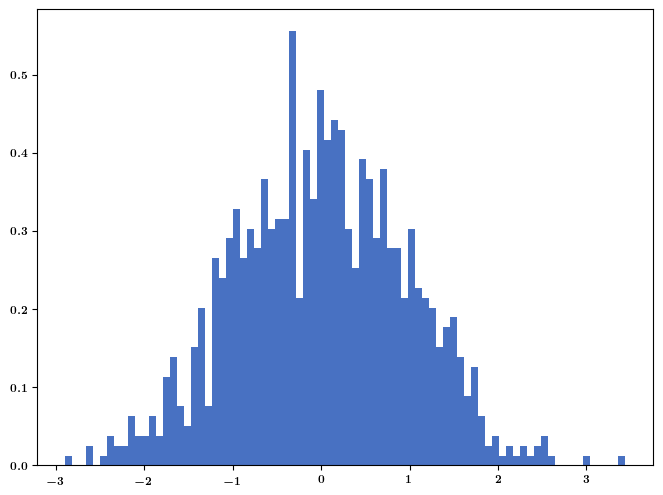

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
frig = np.random.normal(0, 1, 1000)

# Create histogram
counts, bin_edges = np.histogram(frig, bins=80, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plotting
fig, ax = plt.subplots()
ax.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], color=(0.1, 0.3, 0.7, 0.8))

# Shrink the entire frame
left, bottom, width, height = 0.2, 0.2, 0.6, 0.6  # Adjust these values as needed
ax.set_position([left, bottom, width, height])

plt.show()

In [7]:
frig[value]

0.856